# Flu Shot Learning- DMA

## Contributors
- Deonte Allen-Gooden
- Sahil Rai

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from random import randint

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Approach 1 - Deonte Allen-Gooden

## Data Acquistion 

In [2]:
df_train = pd.read_csv('training_set_features.csv', index_col='respondent_id')
df_test = pd.read_csv('test_set_features.csv',  index_col='respondent_id' )
df_labels = pd.read_csv('training_set_labels.csv',  index_col='respondent_id')

## Data Analysis and Pre-processing 

In [3]:
print(df_test.shape)
print(df_train.shape)

(26708, 35)
(26707, 35)


#### Issues Found After Data Inspection

- Missing Data
- Outliers
- Inconsistant values


In [4]:
#combine the labels to my train  and test datasets
df_train = df_train.merge(df_labels,  on='respondent_id')
#df_test = df_test.merge(df_labels,  on='respondent_id')

In [5]:
#check for data types in both of my dataets
print(df_train.dtypes)

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [6]:
print(df_test.dtypes)

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [7]:
from sklearn.impute import SimpleImputer

# create an instance of SimpleImputer with "most_frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# fit the imputer to df_train and transform both df_train and df_test
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)


In [8]:
#missing data review
df_train.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

## Encoding and Normalisation 
- grouping the data numerical types
- scaling the data

In [9]:
#encodding the string using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

# normalistion on my values using standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

ordinal_encoder = OrdinalEncoder()
df_train_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_train.select_dtypes(include=['object'])), 
                                columns=df_train.select_dtypes(include=['object']).columns)
# Combine the encoded features with the numeric features
df_train_encoded = pd.concat([df_train_encoded, df_train.select_dtypes(exclude=['object'])], axis=1)
df_train_encoded = standard_scaler.fit_transform(df_train_encoded)
df_train_encoded

array([[-0.68184881, -2.04427905, -0.22629268, ...,  0.68900552,
        -0.51939056, -0.93342725],
       [ 1.51837305,  1.19702709, -0.22629268, ...,  0.39340041,
        -0.51939056,  1.07132077],
       [-0.68184881, -0.42362598, -0.22629268, ...,  0.68900552,
        -0.51939056, -0.93342725],
       ...,
       [ 0.41826212,  1.19702709, -0.22629268, ...,  0.68900552,
        -0.51939056,  1.07132077],
       [-0.68184881, -0.42362598, -0.22629268, ..., -1.52803281,
        -0.51939056, -0.93342725],
       [-1.78195974, -2.04427905, -0.22629268, ...,  0.68900552,
        -0.51939056, -0.93342725]])

In [10]:
# encodding the string using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()
df_test_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_test.select_dtypes(include=['object'])), 
                                columns=df_test.select_dtypes(include=['object']).columns)
# Combine the encoded features with the numeric features
df_test_encoded = pd.concat([df_test_encoded, df_test.select_dtypes(exclude=['object'])], axis=1)
df_test_encoded = standard_scaler.fit_transform(df_test_encoded)
df_test_encoded

array([[ 0.41667718,  1.19645514, -0.22820155, ..., -0.578243  ,
        -1.06464006, -1.36985515],
       [-0.69252386, -0.43099196, -0.22820155, ..., -0.578243  ,
        -1.06464006,  0.54640333],
       [ 0.41667718,  1.19645514, -0.22820155, ..., -0.578243  ,
         0.57578545, -0.63283266],
       ...,
       [-1.8017249 , -0.43099196, -0.22820155, ..., -0.578243  ,
        -0.51783155,  0.69380783],
       [ 1.52587821, -0.43099196, -0.22820155, ..., -0.578243  ,
        -0.51783155,  0.69380783],
       [ 0.41667718, -0.43099196, -0.22820155, ..., -0.578243  ,
        -0.51783155,  0.69380783]])

## Normalisation Dataset

In [11]:
# normalistion on my values using standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_train_normalised = standard_scaler.fit_transform(df_train_encoded)
# Add column labels to the normalized DataFrame
df_train_normalised = pd.DataFrame(df_train_normalised, columns=df_train.columns)

In [12]:
# normalistion on my values using standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_test_normalised = standard_scaler.fit_transform(df_train_encoded)
# Add column labels to the normalized DataFrame
df_test_normalised = pd.DataFrame(df_train_normalised, columns=df_train.columns)

# Visualisation

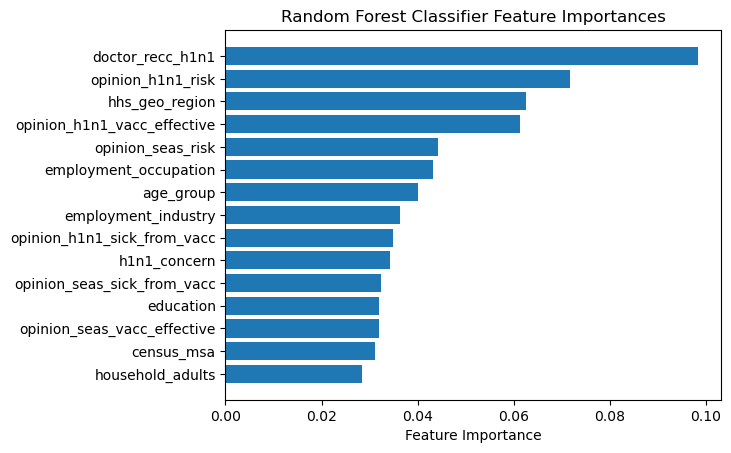

In [13]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into features and target variable
X_train = df_train_normalised.drop(['h1n1_vaccine','seasonal_vaccine'], axis =1)
y_h1n1 = df_labels['h1n1_vaccine']
y_seasonal = df_labels['seasonal_vaccine']

# Create a Random Forest Classifier and fit it to the data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_h1n1)

# Get the feature importances
importances = rfc.feature_importances_

# Sort the features by importance
sorted_idx = importances.argsort()[-15:]

plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Classifier Feature Importances")
plt.show()


## Feature Count Plot

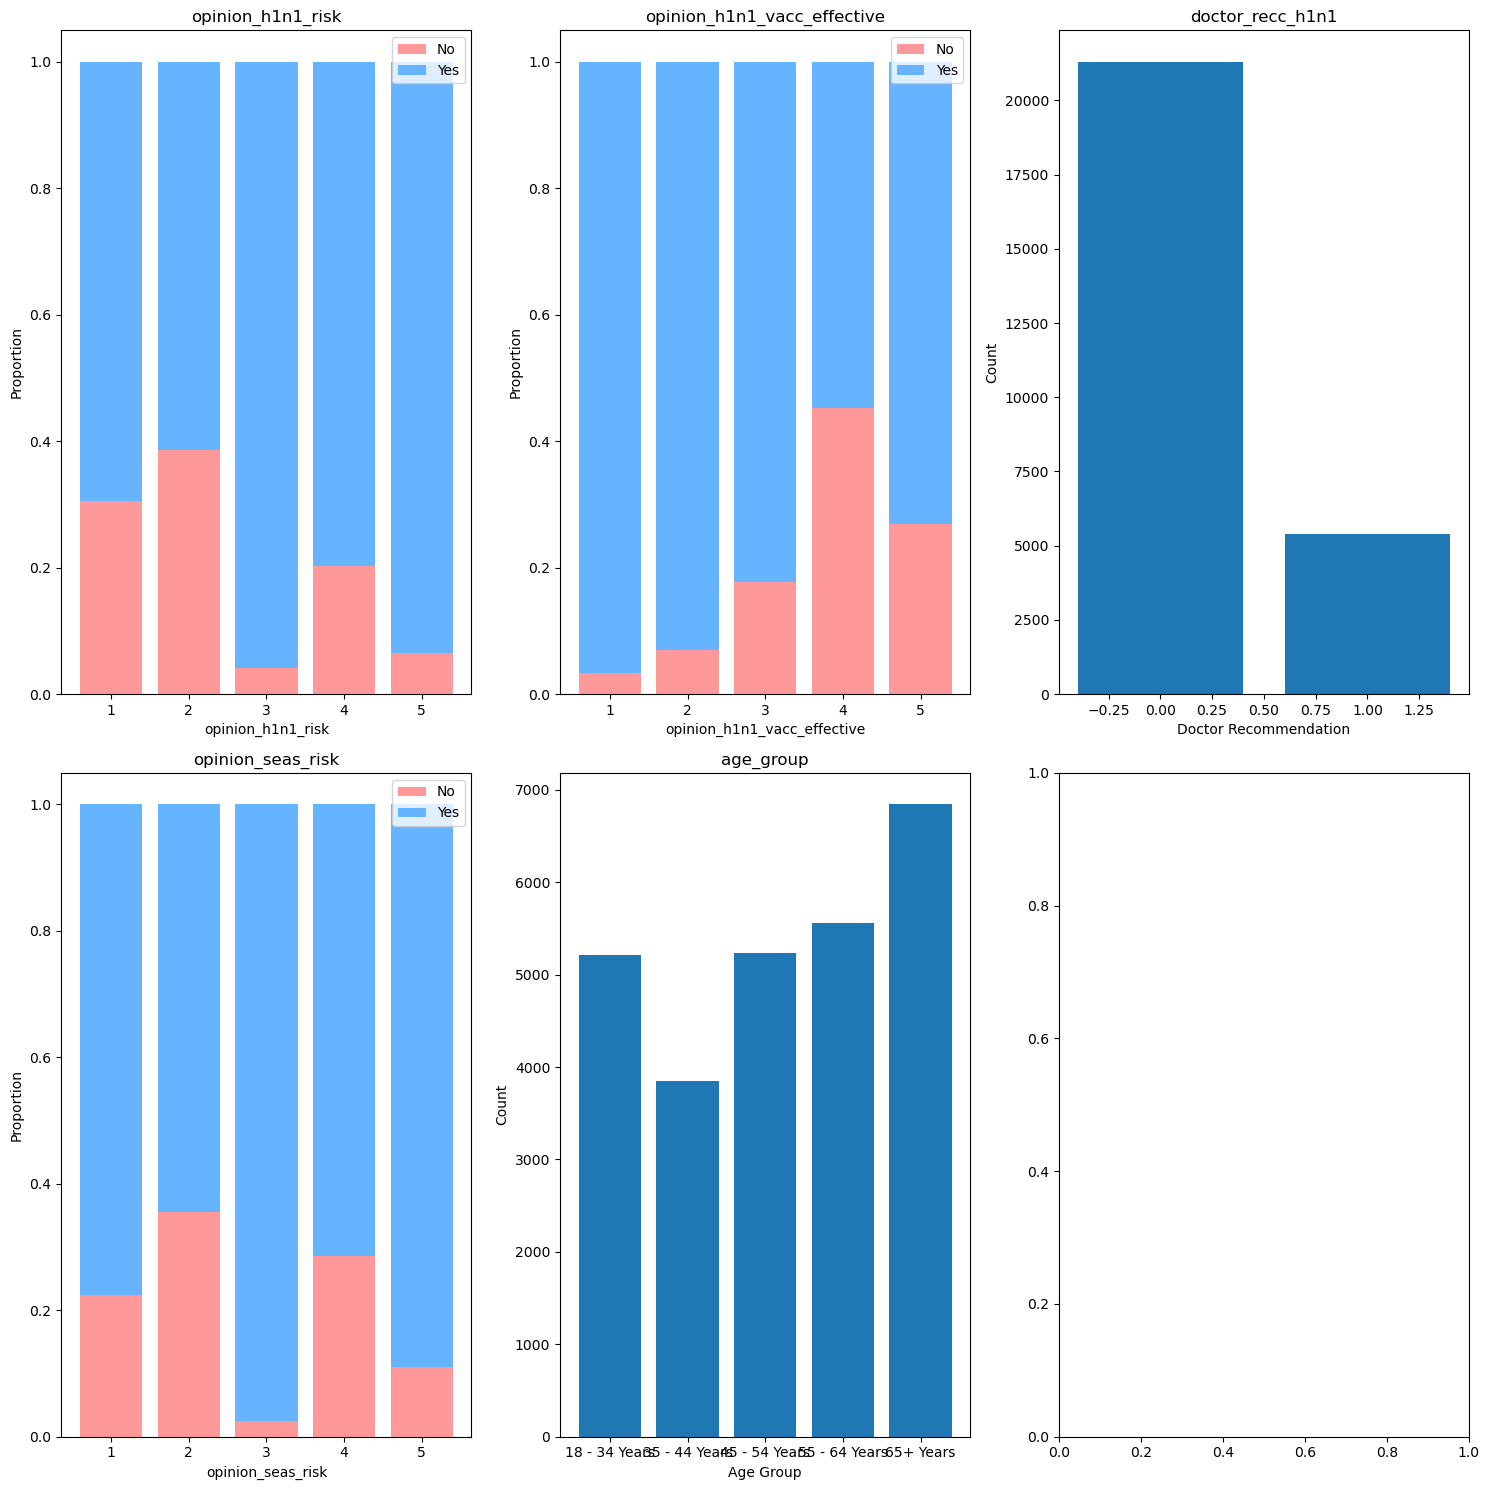

In [14]:
import matplotlib.pyplot as plt

# Define the features for the alternative visualizations
features = ['opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'opinion_seas_risk', 'age_group']

# Set up the grid for subplots
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over the features
for i, feature in enumerate(features):
    # Set the subplot location
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    if feature == 'doctor_recc_h1n1':
        # Bar chart for 'doctor_recc_h1n1'
        counts = df_train[feature].value_counts()
        ax.bar(counts.index, counts.values)
        ax.set_xlabel('Doctor Recommendation')
        ax.set_ylabel('Count')
    elif feature == 'age_group':
        # Bar chart for 'age_group'
        counts = df_train[feature].value_counts().sort_index()
        ax.bar(counts.index, counts.values)
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Count')
    else:
        # Stacked bar chart for other features
        counts = df_train[feature].value_counts(normalize=True).sort_index()
        ax.bar(counts.index, counts.values, label='No', color='#ff9999')
        ax.bar(counts.index, 1 - counts.values, bottom=counts.values, label='Yes', color='#66b3ff')
        ax.set_xlabel(feature)
        ax.set_ylabel('Proportion')
        ax.legend()

    #title 
    ax.set_title(feature)

# Display the alternative visualizations    
plt.tight_layout()
plt.show()

## Classification

## KNN Classifier Tuning

/Users/SRai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/SRai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

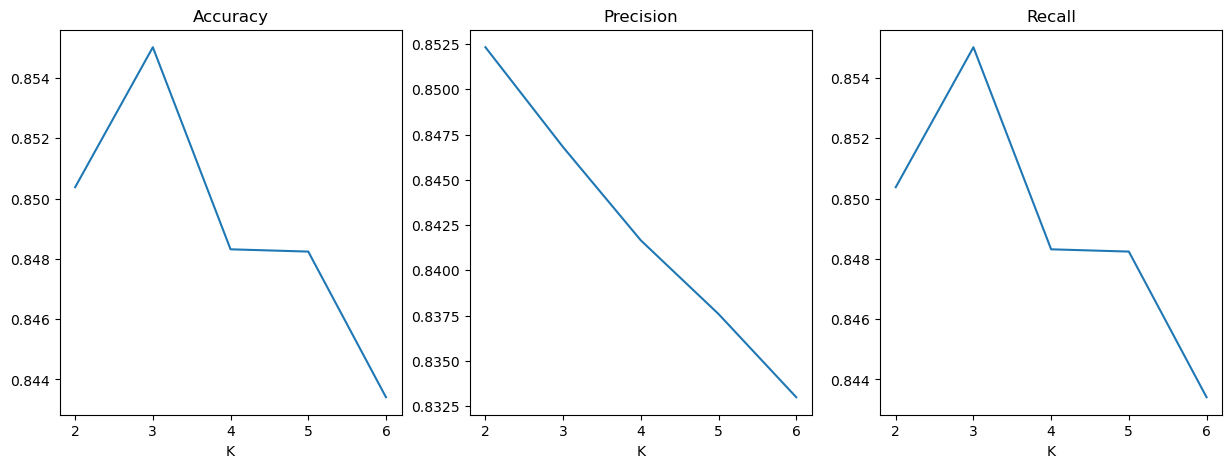

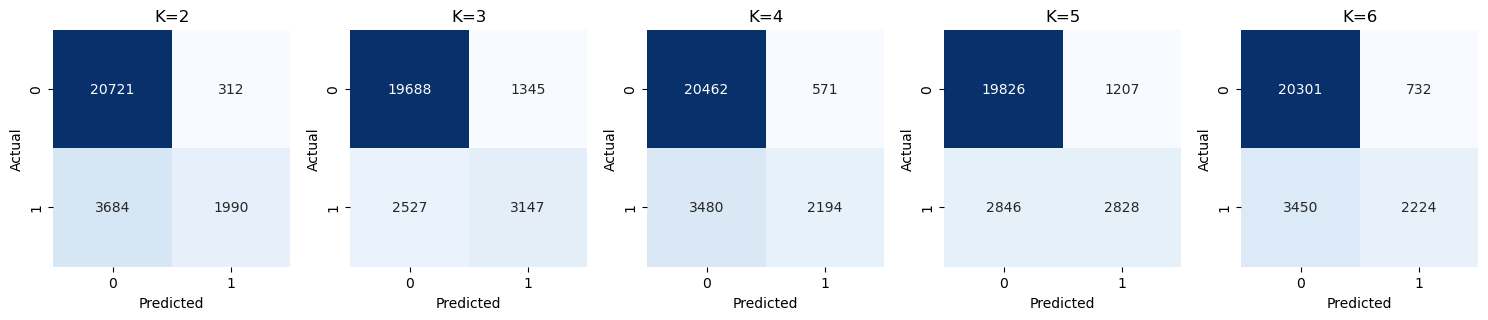

In [15]:
# Select subset of features
attributes = ['opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'hhs_geo_region',
              'opinion_seas_risk', 'employment_industry', 'age_group']


X_train = df_train_normalised[attributes]
y_train_h1n1 = df_labels['h1n1_vaccine'].map({0: 0, 1: 1})
y_train_seasonal = df_labels['seasonal_vaccine'].map({0: 0, 1: 1})
X_test = df_test_normalised[attributes]
y_test_h1n1 = df_labels['h1n1_vaccine'].map({0: 0, 1: 1})
y_test_seasonal = df_labels['seasonal_vaccine'].map({0: 0, 1: 1})


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define range of K values
k_values = range(2, 7)

# Initialize arrays
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

#KNN classification for each value of K
for i, k in enumerate(k_values):
   
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train_h1n1)
    
   
    y_pred_h1n1 = knn.predict(X_test)
    
    # Compute evaluation metrics for H1N1 vaccine
    accuracy[i] = accuracy_score(y_test_h1n1, y_pred_h1n1)
    precision[i] = precision_score(y_test_h1n1, y_pred_h1n1, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test_h1n1, y_pred_h1n1, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test_h1n1, y_pred_h1n1))
    
# Plot 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = [0,1] # labels for axis
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()


In [16]:
# declare features
features = ['opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'hhs_geo_region','opinion_seas_risk','employment_industry','age_group']

# convert the target variables to binary values (0 or 1)
y_h1n1 = df_labels['h1n1_vaccine'].map({0: 0, 1: 1})
y_seasonal = df_labels['seasonal_vaccine'].map({0: 0, 1: 1})

In [17]:
print(df_labels['h1n1_vaccine'].unique())
print(df_labels['seasonal_vaccine'].unique())

[0 1]
[0 1]


In [18]:
# knn classifier
KNN = KNeighborsClassifier(n_neighbors=3)

# fit the classifier 
KNN.fit(X_train, y_train_h1n1)
y_pred_h1n1 = KNN.predict(X_test)

# calculate the accuracy of the classifier for H1N1 vaccine
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
print("Accuracy for H1N1 vaccine:", accuracy_h1n1)

# fit the classifier
KNN.fit(X_train, y_train_seasonal)
y_pred_seasonal = KNN.predict(X_test)

# calculate the accuracy of the classifier for seasonal flu vaccine
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
print("Accuracy for seasonal flu vaccine:", accuracy_seasonal)

/Users/SRai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy for H1N1 vaccine: 0.8550192833339574


/Users/SRai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy for seasonal flu vaccine: 0.7703972741228892


## KNN ROC Curve

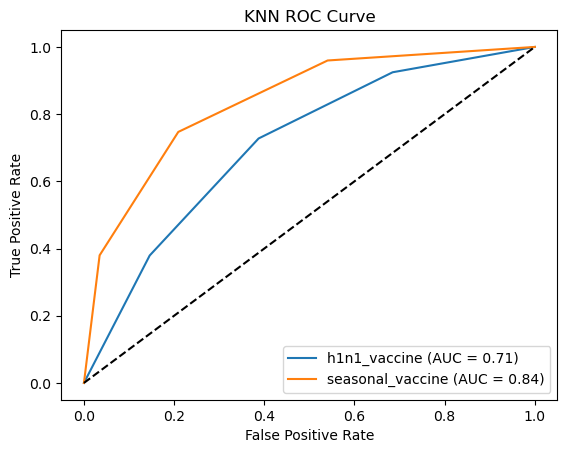

In [19]:
# Predict probabilities for H1N1 vaccine seasonal flu vaccine
y_scores_h1n1 = KNN.predict_proba(X_test)[:, 1]
y_scores_seasonal = KNN.predict_proba(X_test)[:, 1]

fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test_h1n1, y_scores_h1n1)
fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test_seasonal, y_scores_seasonal)

# Calculate AUC for H1N1 vaccine seasonal flu vaccine
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot ROC curves
plt.plot(fpr_h1n1, tpr_h1n1, label='h1n1_vaccine (AUC = %0.2f)' % roc_auc_h1n1)
plt.plot(fpr_seasonal, tpr_seasonal, label='seasonal_vaccine (AUC = %0.2f)' % roc_auc_seasonal)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

## KNN Confusion Matrix

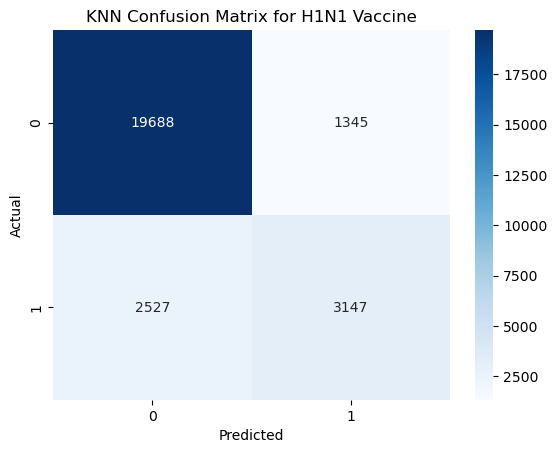

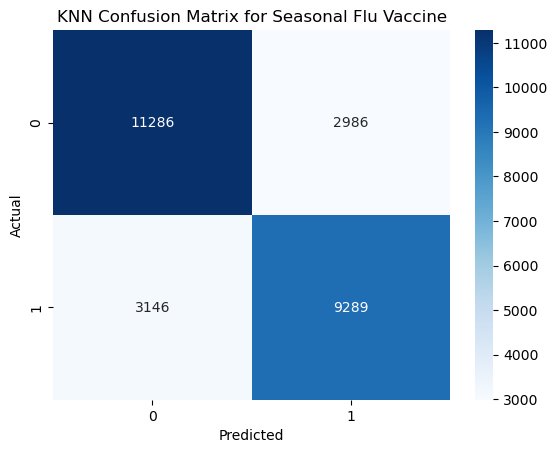

In [20]:

# Calculate the confusion matrix for H1N1 vaccine predictions
cm_h1n1 = confusion_matrix(y_test_h1n1, y_pred_h1n1)

# Plot 
sns.heatmap(cm_h1n1, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Confusion Matrix for H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate the confusion matrix for seasonal flu vaccine predictions
cm_seasonal = confusion_matrix(y_test_seasonal, y_pred_seasonal)

# Plot
sns.heatmap(cm_seasonal, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Confusion Matrix for Seasonal Flu Vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Classification Report - KNN

In [21]:
# Print the classification report for H1N1 vaccine prediction
print("Classification Report for H1N1 vaccine:")
print(classification_report(y_test_h1n1, y_pred_h1n1))

Classification Report for H1N1 vaccine:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     21033
           1       0.70      0.55      0.62      5674

    accuracy                           0.86     26707
   macro avg       0.79      0.75      0.76     26707
weighted avg       0.85      0.86      0.85     26707



In [22]:
# print the classification report for seasonal flu vaccine prediction
print("Classification Report for seasonal flu vaccine:")
print(classification_report(y_test_seasonal, y_pred_seasonal))

Classification Report for seasonal flu vaccine:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79     14272
           1       0.76      0.75      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



## Gaussian NB Model

In [23]:
# Select the relevant features and target variable for H1N1 vaccine prediction
X_train = df_train_normalised[features]
y_train_h1n1 = y_h1n1
y_train_seasonal = y_seasonal
X_test = df_test_normalised[features]
y_test_h1n1 = df_labels["h1n1_vaccine"]
y_test_seasonal = df_labels["seasonal_vaccine"]

# create a Naive Bayes classifier
nb = GaussianNB()

# fit the classifier 
nb.fit(X_train, y_train_h1n1)
y_pred_h1n1 = nb.predict(X_test)

# calculate the accuracy of the classifier for H1N1 vaccine
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
print("Accuracy for H1N1 vaccine:", accuracy_h1n1)

# fit the classifier
nb.fit(X_train, y_train_seasonal)
y_pred_seasonal = nb.predict(X_test)

# calculate the accuracy of the classifier for seasonal flu vaccine
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
print("Accuracy for seasonal flu vaccine:", accuracy_seasonal)

Accuracy for H1N1 vaccine: 0.8072789905268282
Accuracy for seasonal flu vaccine: 0.6965963979481035


## Decision Tree Classifier

In [24]:
X_train = df_train_normalised[features]
y_train_h1n1 = y_h1n1
y_train_seasonal = y_seasonal
X_test = df_test_normalised[features]
y_test_h1n1 = df_labels["h1n1_vaccine"]
y_test_seasonal = df_labels["seasonal_vaccine"]

# create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# fit the classifier
dt.fit(X_train, y_train_h1n1)
y_pred_h1n1 = dt.predict(X_test)

# calculate the accuracy of the classifier for H1N1 vaccine
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
print("Accuracy for H1N1 vaccine:", accuracy_h1n1)

# fit the classifier
dt.fit(X_train, y_train_seasonal)
y_pred_seasonal = dt.predict(X_test)

# calculate the accuracy of the classifier for seasonal flu vaccine
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
print("Accuracy for seasonal flu vaccine:", accuracy_seasonal)


Accuracy for H1N1 vaccine: 0.9044070842850189
Accuracy for seasonal flu vaccine: 0.8483169206575055


# Decision Tree Roc Curve

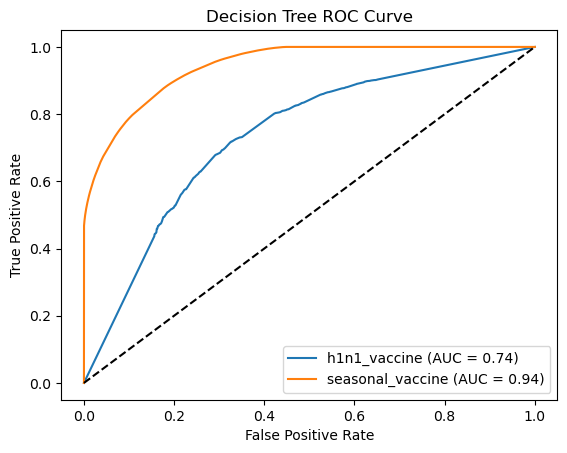

In [25]:
# Predict probabilities for H1N1 vaccine seasonal flu vaccine
y_scores_h1n1 = dt.predict_proba(X_test)[:, 1] 
y_scores_seasonal = dt.predict_proba(X_test)[:, 1]


fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test_h1n1, y_scores_h1n1)
fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test_seasonal, y_scores_seasonal)

# Calculate AUC for H1N1 vaccine seasonal flu vaccine
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot ROC curve for H1N1 vaccine seasonal flu vaccine
plt.plot(fpr_h1n1, tpr_h1n1, label='h1n1_vaccine (AUC = %0.2f)' % roc_auc_h1n1)
plt.plot(fpr_seasonal, tpr_seasonal, label='seasonal_vaccine (AUC = %0.2f)' % roc_auc_seasonal)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree Confusion Matrix

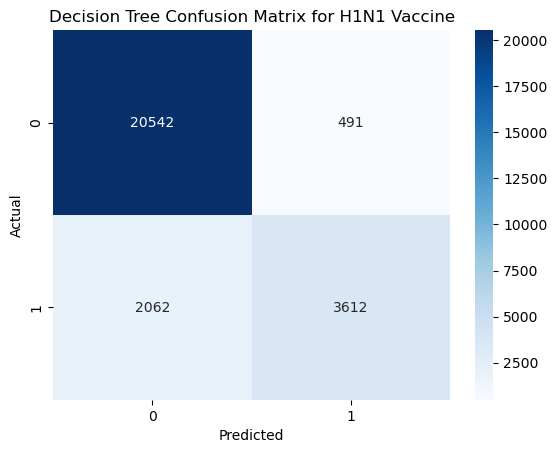

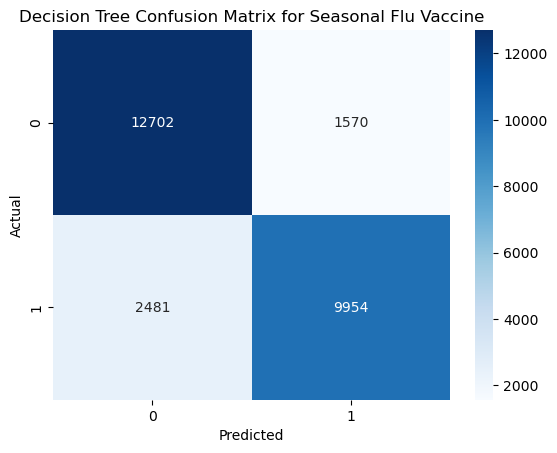

In [26]:
# Calculate the confusion matrix for H1N1 vaccine predictions
cm_h1n1 = confusion_matrix(y_test_h1n1, y_pred_h1n1)

# Plot
sns.heatmap(cm_h1n1, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Confusion Matrix for H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate the confusion matrix for seasonal flu vaccine predictions
cm_seasonal = confusion_matrix(y_test_seasonal, y_pred_seasonal)

# Plot
sns.heatmap(cm_seasonal, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Confusion Matrix for Seasonal Flu Vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Classification Report - DT

In [27]:
# Print the classification report for H1N1 vaccine prediction
print("Classification Report for H1N1 vaccine:")
print(classification_report(y_test_h1n1, y_pred_h1n1))

Classification Report for H1N1 vaccine:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     21033
           1       0.88      0.64      0.74      5674

    accuracy                           0.90     26707
   macro avg       0.89      0.81      0.84     26707
weighted avg       0.90      0.90      0.90     26707



In [28]:
print("Classification Report for seasonal flu vaccine:")
print(classification_report(y_test_seasonal, y_pred_seasonal))

Classification Report for seasonal flu vaccine:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     14272
           1       0.86      0.80      0.83     12435

    accuracy                           0.85     26707
   macro avg       0.85      0.85      0.85     26707
weighted avg       0.85      0.85      0.85     26707



## Decision Tree parameter evaluation

In [29]:
# GridSearchCV section
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search_h1n1 = GridSearchCV(dt, param_grid, cv=5)
grid_search_seasonal = GridSearchCV(dt, param_grid, cv=5)

# perform grid search for H1N1 vaccine
grid_search_h1n1.fit(X_train, y_train_h1n1)
best_dt_h1n1 = grid_search_h1n1.best_estimator_
y_pred_h1n1 = best_dt_h1n1.predict(X_test)
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)

# print h1n1 results
print("Accuracy for H1N1 vaccine:", accuracy_h1n1)
print("Best hyperparameters for H1N1 vaccine:", grid_search_h1n1.best_params_)

# perform grid search for seasonal flu vaccine
grid_search_seasonal.fit(X_train, y_train_seasonal)
best_dt_seasonal = grid_search_seasonal.best_estimator_
y_pred_seasonal = best_dt_seasonal.predict(X_test)
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)

# print seasonal results
print("Accuracy for seasonal flu vaccine:", accuracy_seasonal)
print("Best hyperparameters for seasonal flu vaccine:", grid_search_seasonal.best_params_)

Accuracy for H1N1 vaccine: 0.82820983262815
Best hyperparameters for H1N1 vaccine: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy for seasonal flu vaccine: 0.724154715992062
Best hyperparameters for seasonal flu vaccine: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [30]:
# GridSearchCV section
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

grid_search_h1n1 = GridSearchCV(dt, param_grid, cv=5)
grid_search_seasonal = GridSearchCV(dt, param_grid, cv=5)

# grid search for H1N1 vaccine
print("Performing grid search for H1N1 vaccine...")
grid_search_h1n1.fit(X_train, y_train_h1n1)
best_dt_h1n1 = grid_search_h1n1.best_estimator_
y_pred_h1n1 = best_dt_h1n1.predict(X_test)
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
print("Grid search CV results:", grid_search_h1n1.cv_results_)

# H1N1 vaccine results
print("H1N1 vaccine results:")
print("Accuracy:", accuracy_h1n1)
print("Best hyperparameters:", grid_search_h1n1.best_params_)

# grid search for seasonal flu vaccine
print("Performing grid search for seasonal flu vaccine...")
grid_search_seasonal.fit(X_train, y_train_seasonal)
best_dt_seasonal = grid_search_seasonal.best_estimator_
y_pred_seasonal = best_dt_seasonal.predict(X_test)
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
print("Grid search CV results:", grid_search_seasonal.cv_results_)


# seasonal flu vaccine results
print("Seasonal flu vaccine results:")
print("Accuracy:", accuracy_seasonal)
print("Best hyperparameters:", grid_search_seasonal.best_params_)

Performing grid search for H1N1 vaccine...
Grid search CV results: {'mean_fit_time': array([0.04698682, 0.03901796, 0.03965659, 0.038205  , 0.04192662,
       0.0392652 , 0.04063144, 0.04747214, 0.06021829, 0.03001747,
       0.03217235, 0.02731919, 0.02694502, 0.02514195, 0.03005447,
       0.02729301, 0.02524567, 0.02530465, 0.04110289, 0.05367837,
       0.03924208, 0.0362771 , 0.03743415, 0.03283734, 0.03091898,
       0.0343914 , 0.03383203, 0.04078698, 0.03592315, 0.03464198,
       0.03701372, 0.03586359, 0.03571253, 0.03797002, 0.04203801,
       0.03719873]), 'std_fit_time': array([0.00556707, 0.00083744, 0.00148319, 0.00077501, 0.0031715 ,
       0.00197732, 0.00219924, 0.00747326, 0.01243056, 0.00223511,
       0.00679779, 0.00364198, 0.00413718, 0.00185057, 0.00198399,
       0.00388367, 0.0026305 , 0.00077634, 0.00295613, 0.01256168,
       0.0014453 , 0.00288833, 0.00344413, 0.00173524, 0.00062015,
       0.00123838, 0.00324487, 0.00268425, 0.00076617, 0.00064504,
       

Grid search CV results: {'mean_fit_time': array([0.05652018, 0.04509363, 0.03895555, 0.0417954 , 0.04132891,
       0.04001555, 0.04523959, 0.03827133, 0.03932648, 0.03302417,
       0.01933208, 0.01953926, 0.02055602, 0.01879821, 0.01901979,
       0.01933999, 0.01998734, 0.01967535, 0.02872796, 0.02938557,
       0.03033714, 0.02986007, 0.02938361, 0.02996259, 0.02845521,
       0.02882924, 0.03026185, 0.03862562, 0.03832083, 0.03800569,
       0.03636117, 0.04332538, 0.03758006, 0.03649621, 0.03936496,
       0.03638253]), 'std_fit_time': array([0.02290462, 0.00636212, 0.00111127, 0.00226564, 0.00076053,
       0.00156269, 0.00579265, 0.00091197, 0.00110817, 0.01501094,
       0.00028471, 0.00033545, 0.00030084, 0.00070912, 0.00059931,
       0.00052909, 0.00074721, 0.00070034, 0.00075149, 0.00132822,
       0.00047298, 0.00073305, 0.00056534, 0.00103703, 0.00076899,
       0.00066678, 0.00100779, 0.00111598, 0.00100405, 0.00070146,
       0.00164833, 0.00555427, 0.00396092, 0.00110

# Approach 2 - Sahil Rai

## 1.1 Load data

In [31]:
df_trainV2 = pd.read_csv('training_set_features.csv', index_col='respondent_id')
df_testV2 = pd.read_csv('test_set_features.csv', index_col='respondent_id')
df_labelsV2 = pd.read_csv('training_set_labels.csv', index_col='respondent_id')

In [32]:
df_trainV2 = df_trainV2.merge(df_labelsV2,  on='respondent_id')
df_testV2 = df_testV2.merge(df_labelsV2,  on='respondent_id')

In [33]:
df_trainV2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [34]:
print(df_testV2.shape)
print(df_testV2.shape)

(0, 37)
(0, 37)


In [35]:
df_trainV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [36]:
missingdataV2 = df_trainV2.notnull()
for column in missingdataV2.columns.values.tolist():
    print(column)
    print (missingdataV2[column].value_counts())
    print("") 

h1n1_concern
True     26615
False       92
Name: h1n1_concern, dtype: int64

h1n1_knowledge
True     26591
False      116
Name: h1n1_knowledge, dtype: int64

behavioral_antiviral_meds
True     26636
False       71
Name: behavioral_antiviral_meds, dtype: int64

behavioral_avoidance
True     26499
False      208
Name: behavioral_avoidance, dtype: int64

behavioral_face_mask
True     26688
False       19
Name: behavioral_face_mask, dtype: int64

behavioral_wash_hands
True     26665
False       42
Name: behavioral_wash_hands, dtype: int64

behavioral_large_gatherings
True     26620
False       87
Name: behavioral_large_gatherings, dtype: int64

behavioral_outside_home
True     26625
False       82
Name: behavioral_outside_home, dtype: int64

behavioral_touch_face
True     26579
False      128
Name: behavioral_touch_face, dtype: int64

doctor_recc_h1n1
True     24547
False     2160
Name: doctor_recc_h1n1, dtype: int64

doctor_recc_seasonal
True     24547
False     2160
Name: doctor_recc_sea

## 1.2 Data Wrangling

From this, we can see that there are missing data which needs to be dealt with and also, object data type are occuring.
Steps for pre-processing and data wrangling
* Replace missing data with the random (due to binary nature of data set)
* Utilise binary encoding, to tranform categories to binary data 

In [37]:
#Function to return impute random value 
def random_value(column):
    dropped_value = column.dropna()
    random_choice = np.random.choice(dropped_value)
    return random_choice

#impute random values to each feature
for column in df_trainV2.columns:
    df_trainV2[column].fillna(random_value(df_trainV2[column]), inplace=True)
    
for column in df_testV2.columns:
    df_testV2[column].fillna(random_value(df_trainV2[column]), inplace=True)

In [38]:
print("Missing Data count in training set \n",  df_trainV2.isnull().sum())

Missing Data count in training set 
 h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_ge

No more missing values, therefore succesfully imputed. But still need to convert categories

In [39]:
df_trainV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [40]:
encode_label = LabelEncoder()
for column in df_trainV2.columns:
    if df_trainV2[column].dtype == 'object':
        df_trainV2[column] = encode_label.fit_transform(df_trainV2[column])
        
for column in df_testV2.columns:
    if df_testV2[column].dtype == 'object':
        df_testV2[column] = encode_label.fit_transform(df_testV2[column])
        
print(df_trainV2)

               h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   
...                     ...             ...                        ...   
26702                   2.0             0.0                        0.0   
26703                   1.0             2.0                        0.0   
26704                   2.0             2.0                        0.0   
26705                   1.0             1.0                        0.0   
26706                   0.0             0.0                        0.0   

               behavioral_avoidance  

In [41]:
#Checking for encoding
df_trainV2.head()
df_trainV2

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,8,2,0.0,0.0,16,5,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,1,0,0.0,0.0,12,19,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,9,0,2.0,0.0,14,21,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,1,5,1,0.0,0.0,16,5,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,9,0,1.0,0.0,18,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,9,2,0.0,0.0,16,5,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,6,1,1.0,0.0,4,2,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,1,6,0,0.0,0.0,16,5,0,1


All categories are now encoded to have binary representation.
* Now lets quickly randomise the data, so the order doesn't affect the training and testing tests.

## 2 Viusalisation

Visualisaing the vaccination count: 
* h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
* seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes.

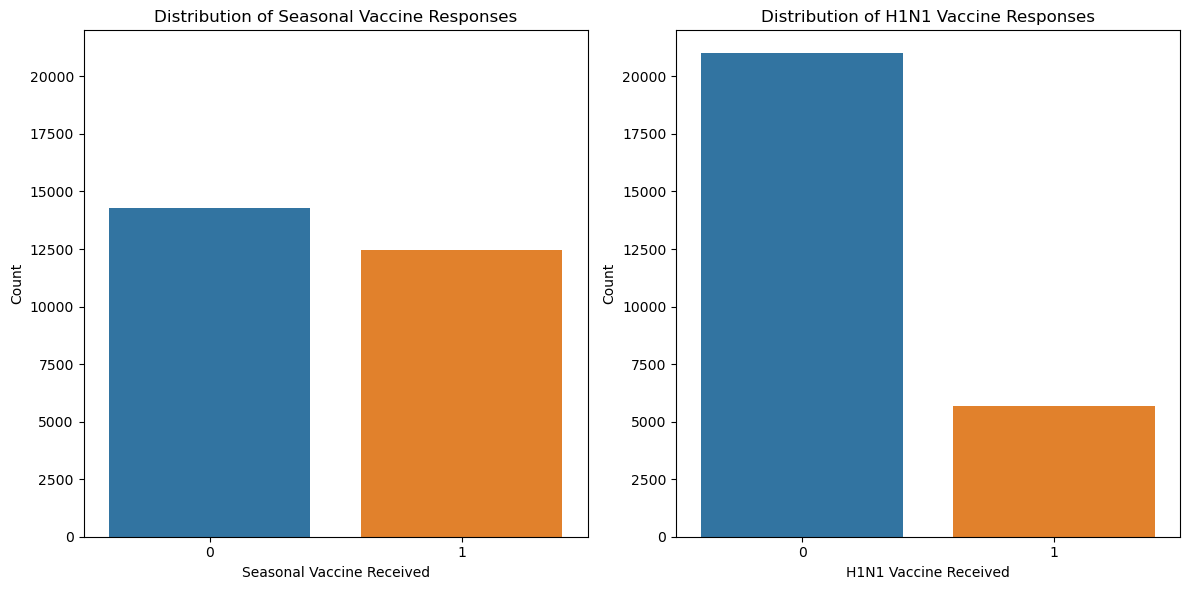

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Setting a scale to porvide a fairer comparison
max_count = 22000

#Plotting Seasonal vaccine counts
sns.countplot(x='seasonal_vaccine', data=df_labelsV2, ax=axes[0])
axes[0].set_title('Distribution of Seasonal Vaccine Responses')
axes[0].set_xlabel('Seasonal Vaccine Received')
axes[0].set_ylabel('Count')
axes[0].set_ylim([0, max_count])

#Plotting H1N1 vaccine counts
sns.countplot(x='h1n1_vaccine', data=df_labelsV2, ax=axes[1])
axes[1].set_title('Distribution of H1N1 Vaccine Responses')
axes[1].set_xlabel('H1N1 Vaccine Received')
axes[1].set_ylabel('Count')
axes[1].set_ylim([0, max_count])

plt.tight_layout()
plt.show()

This shows a balanced response for seasonal vaccination, however there is bias against H1N1 vaccination where it is more likely people haven't taken the vaccination

In [43]:
#Selecting features based on most important
features = ['opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'hhs_geo_region', 'opinion_seas_risk', 'employment_industry', 'age_group']

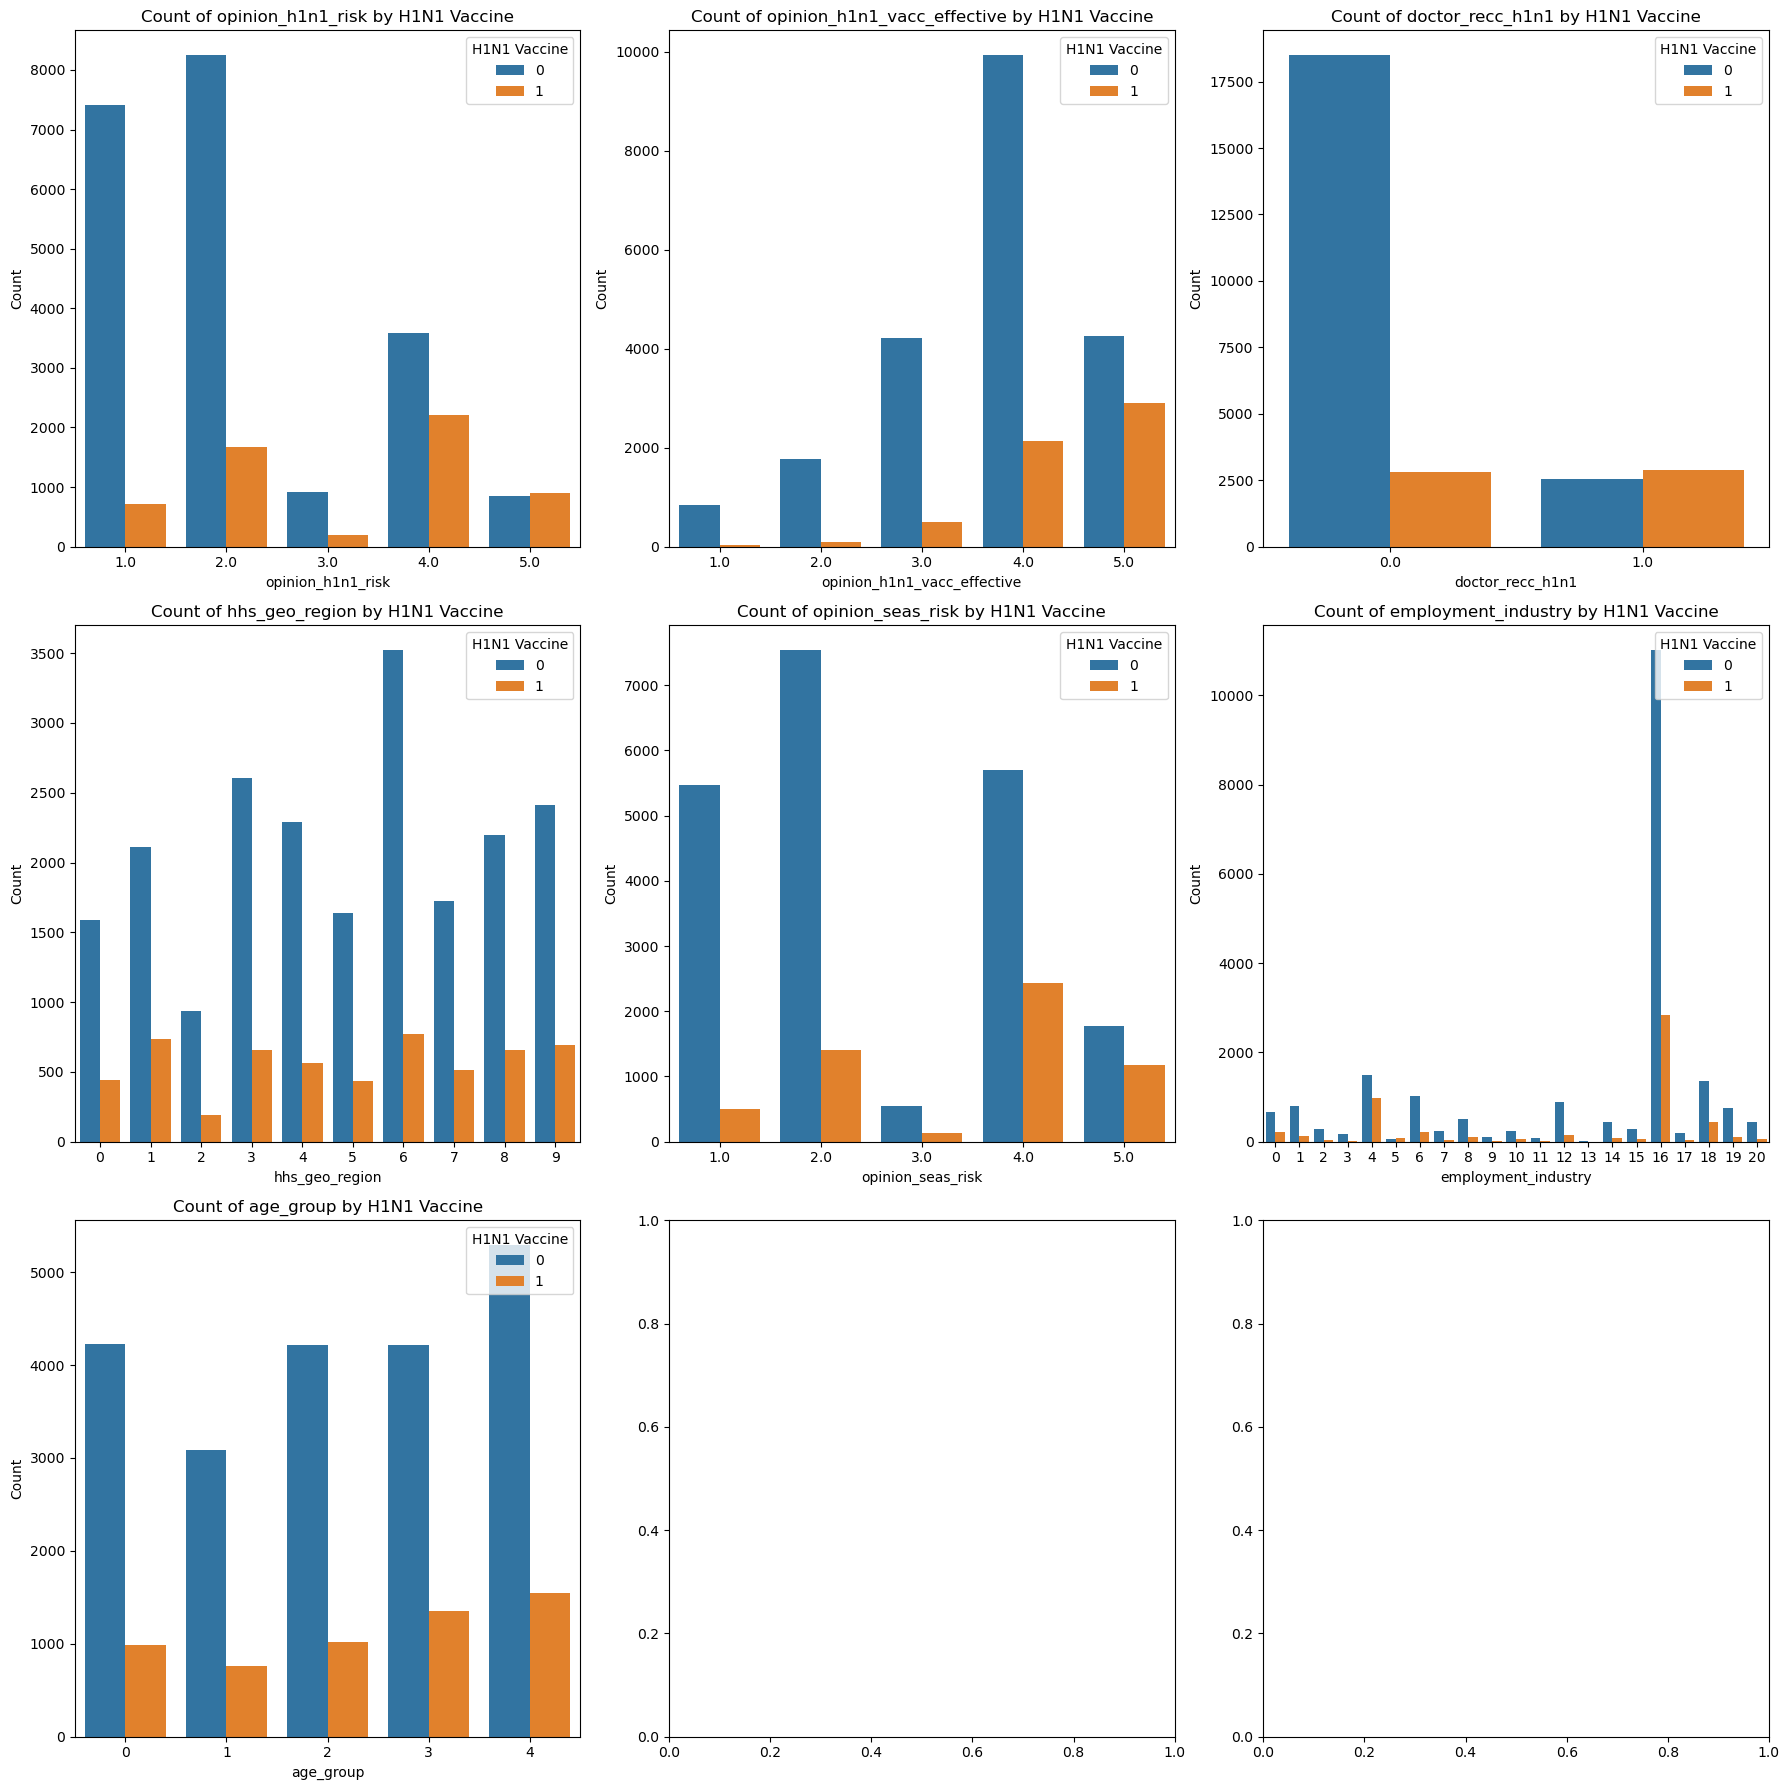

In [44]:
#Bar chart for each features of H1N1 reponse
num_features = len(features)
num_rows = (num_features - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    sns.countplot(x=feature, hue='h1n1_vaccine', data=df_trainV2, ax=ax)
    ax.set_title(f'Count of {feature} by H1N1 Vaccine')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='H1N1 Vaccine', loc='upper right')


plt.tight_layout()
plt.show()

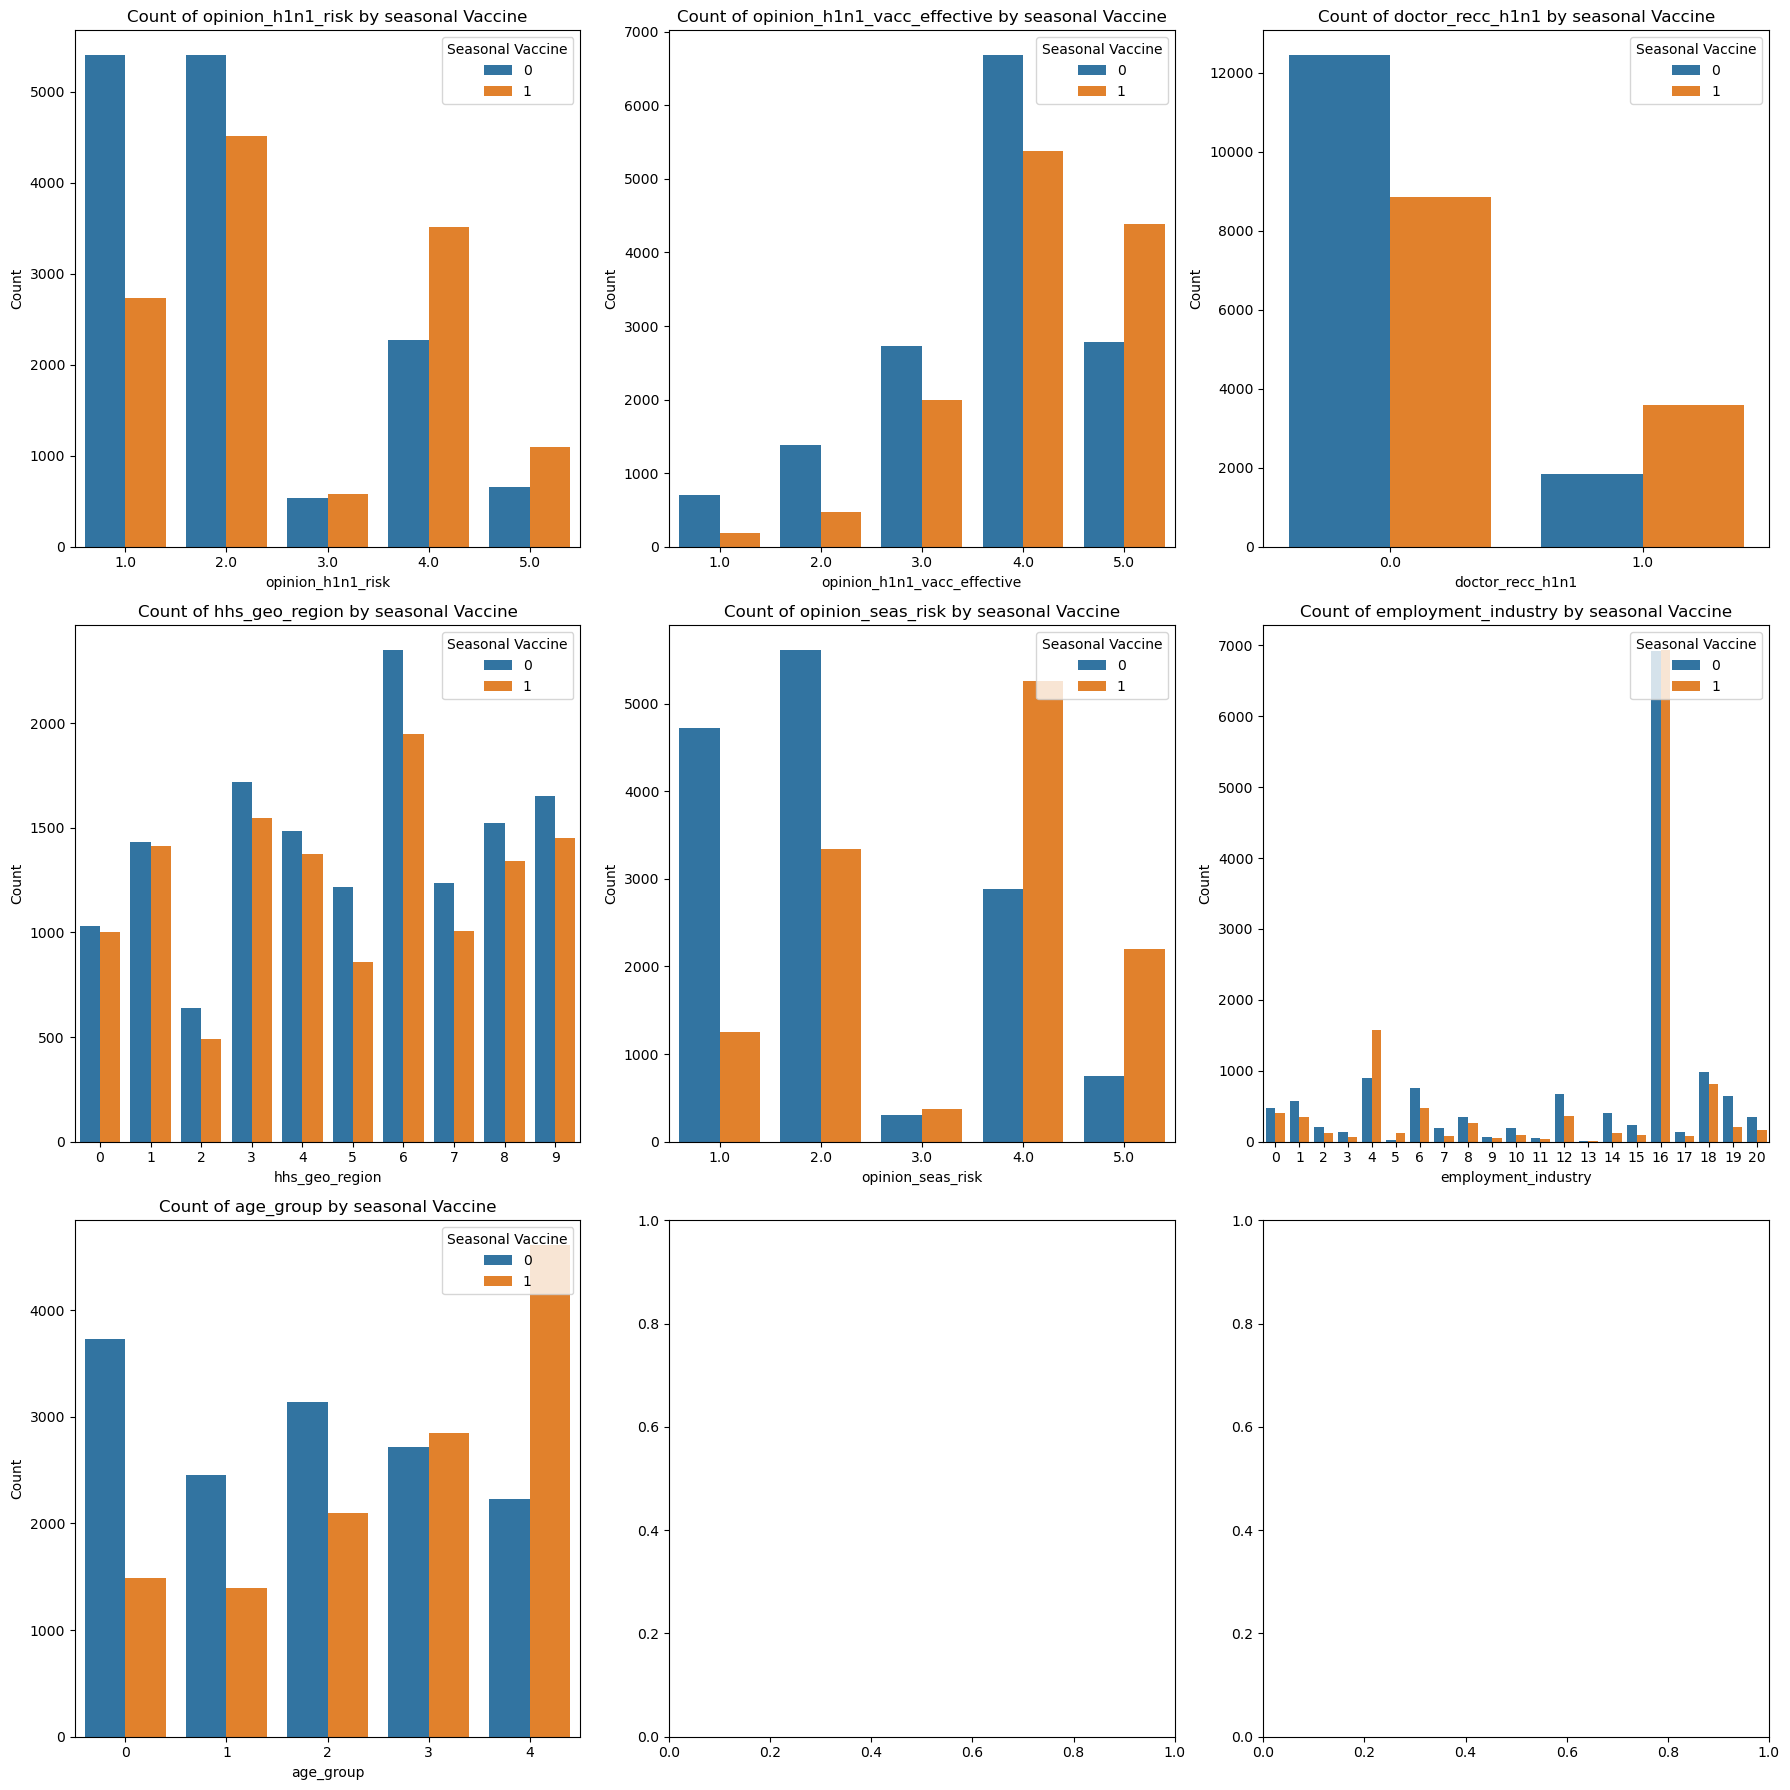

In [45]:
#Bar chart for each features of Seasonal vaccine response
num_features = len(features)
num_rows = (num_features - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    sns.countplot(x=feature, hue='seasonal_vaccine', data=df_trainV2, ax=ax)
    ax.set_title(f'Count of {feature} by seasonal Vaccine')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Seasonal Vaccine', loc='upper right')

plt.tight_layout()
plt.show()

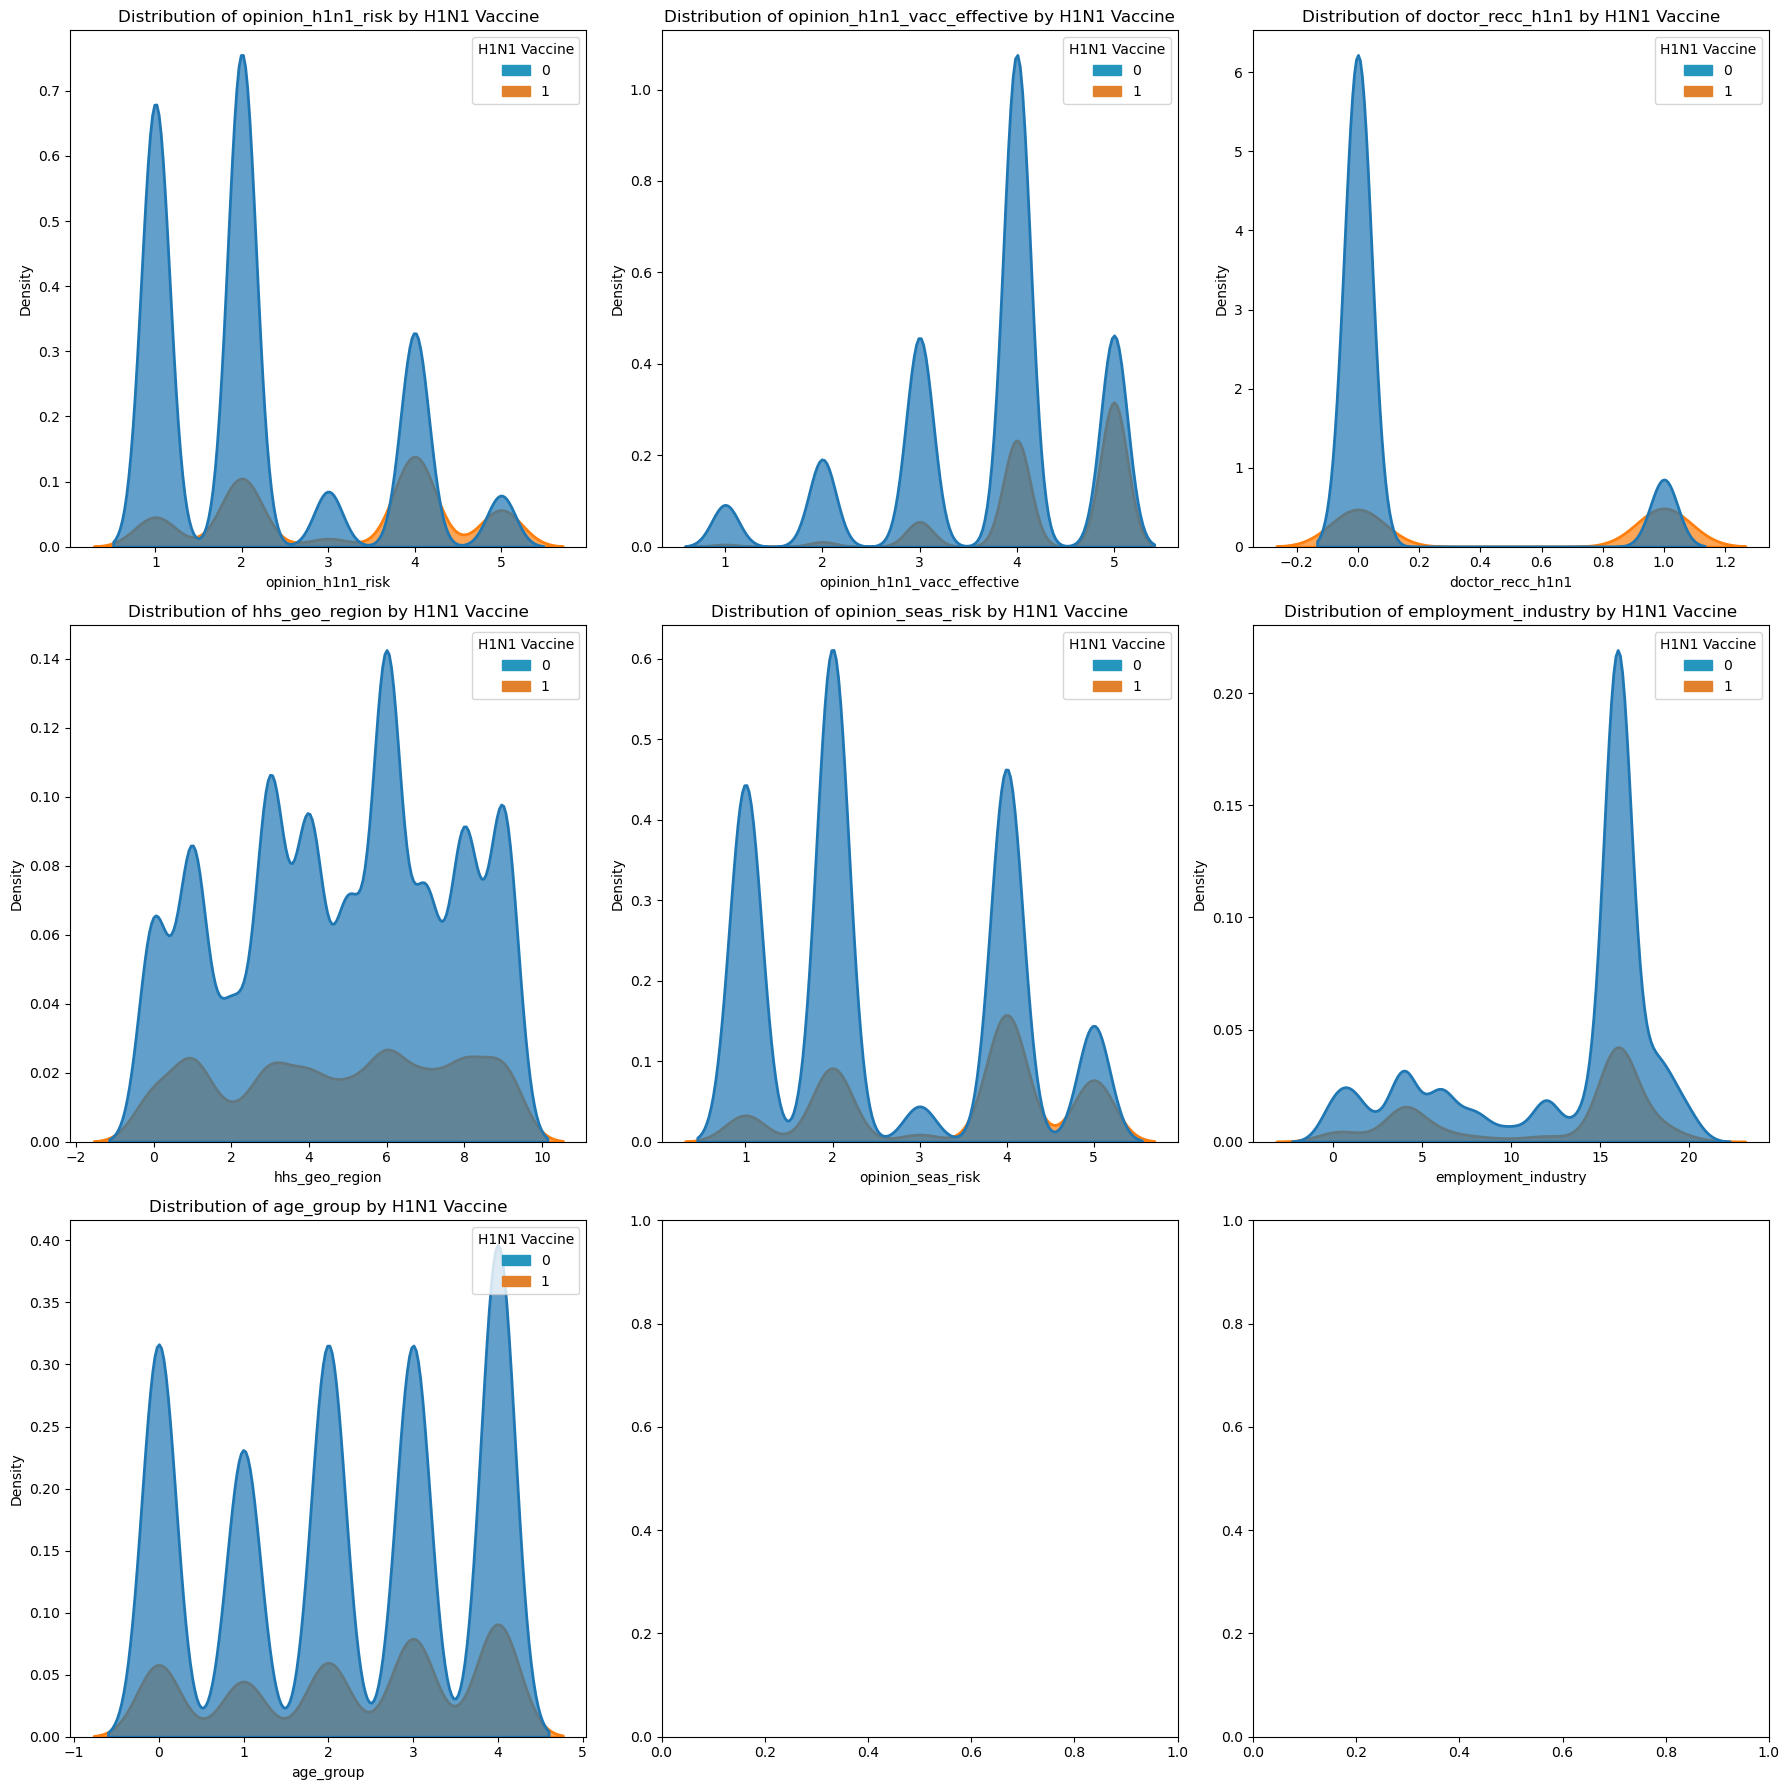

In [46]:
num_features = len(features)
num_rows = (num_features - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

# Creating Density plots for all feauters
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    sns.kdeplot(data=df_trainV2, x=feature, hue='h1n1_vaccine', fill=True, ax=ax, linewidth=2, alpha=0.7)
    ax.set_title(f'Distribution of {feature} by H1N1 Vaccine')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

    legend_handles = [
        mpatches.Patch(color='#2596be', label='0'),
        mpatches.Patch(color='#e1812c', label='1')
    ]
    ax.legend(handles=legend_handles, title='H1N1 Vaccine', loc='upper right')

plt.tight_layout()
plt.show()

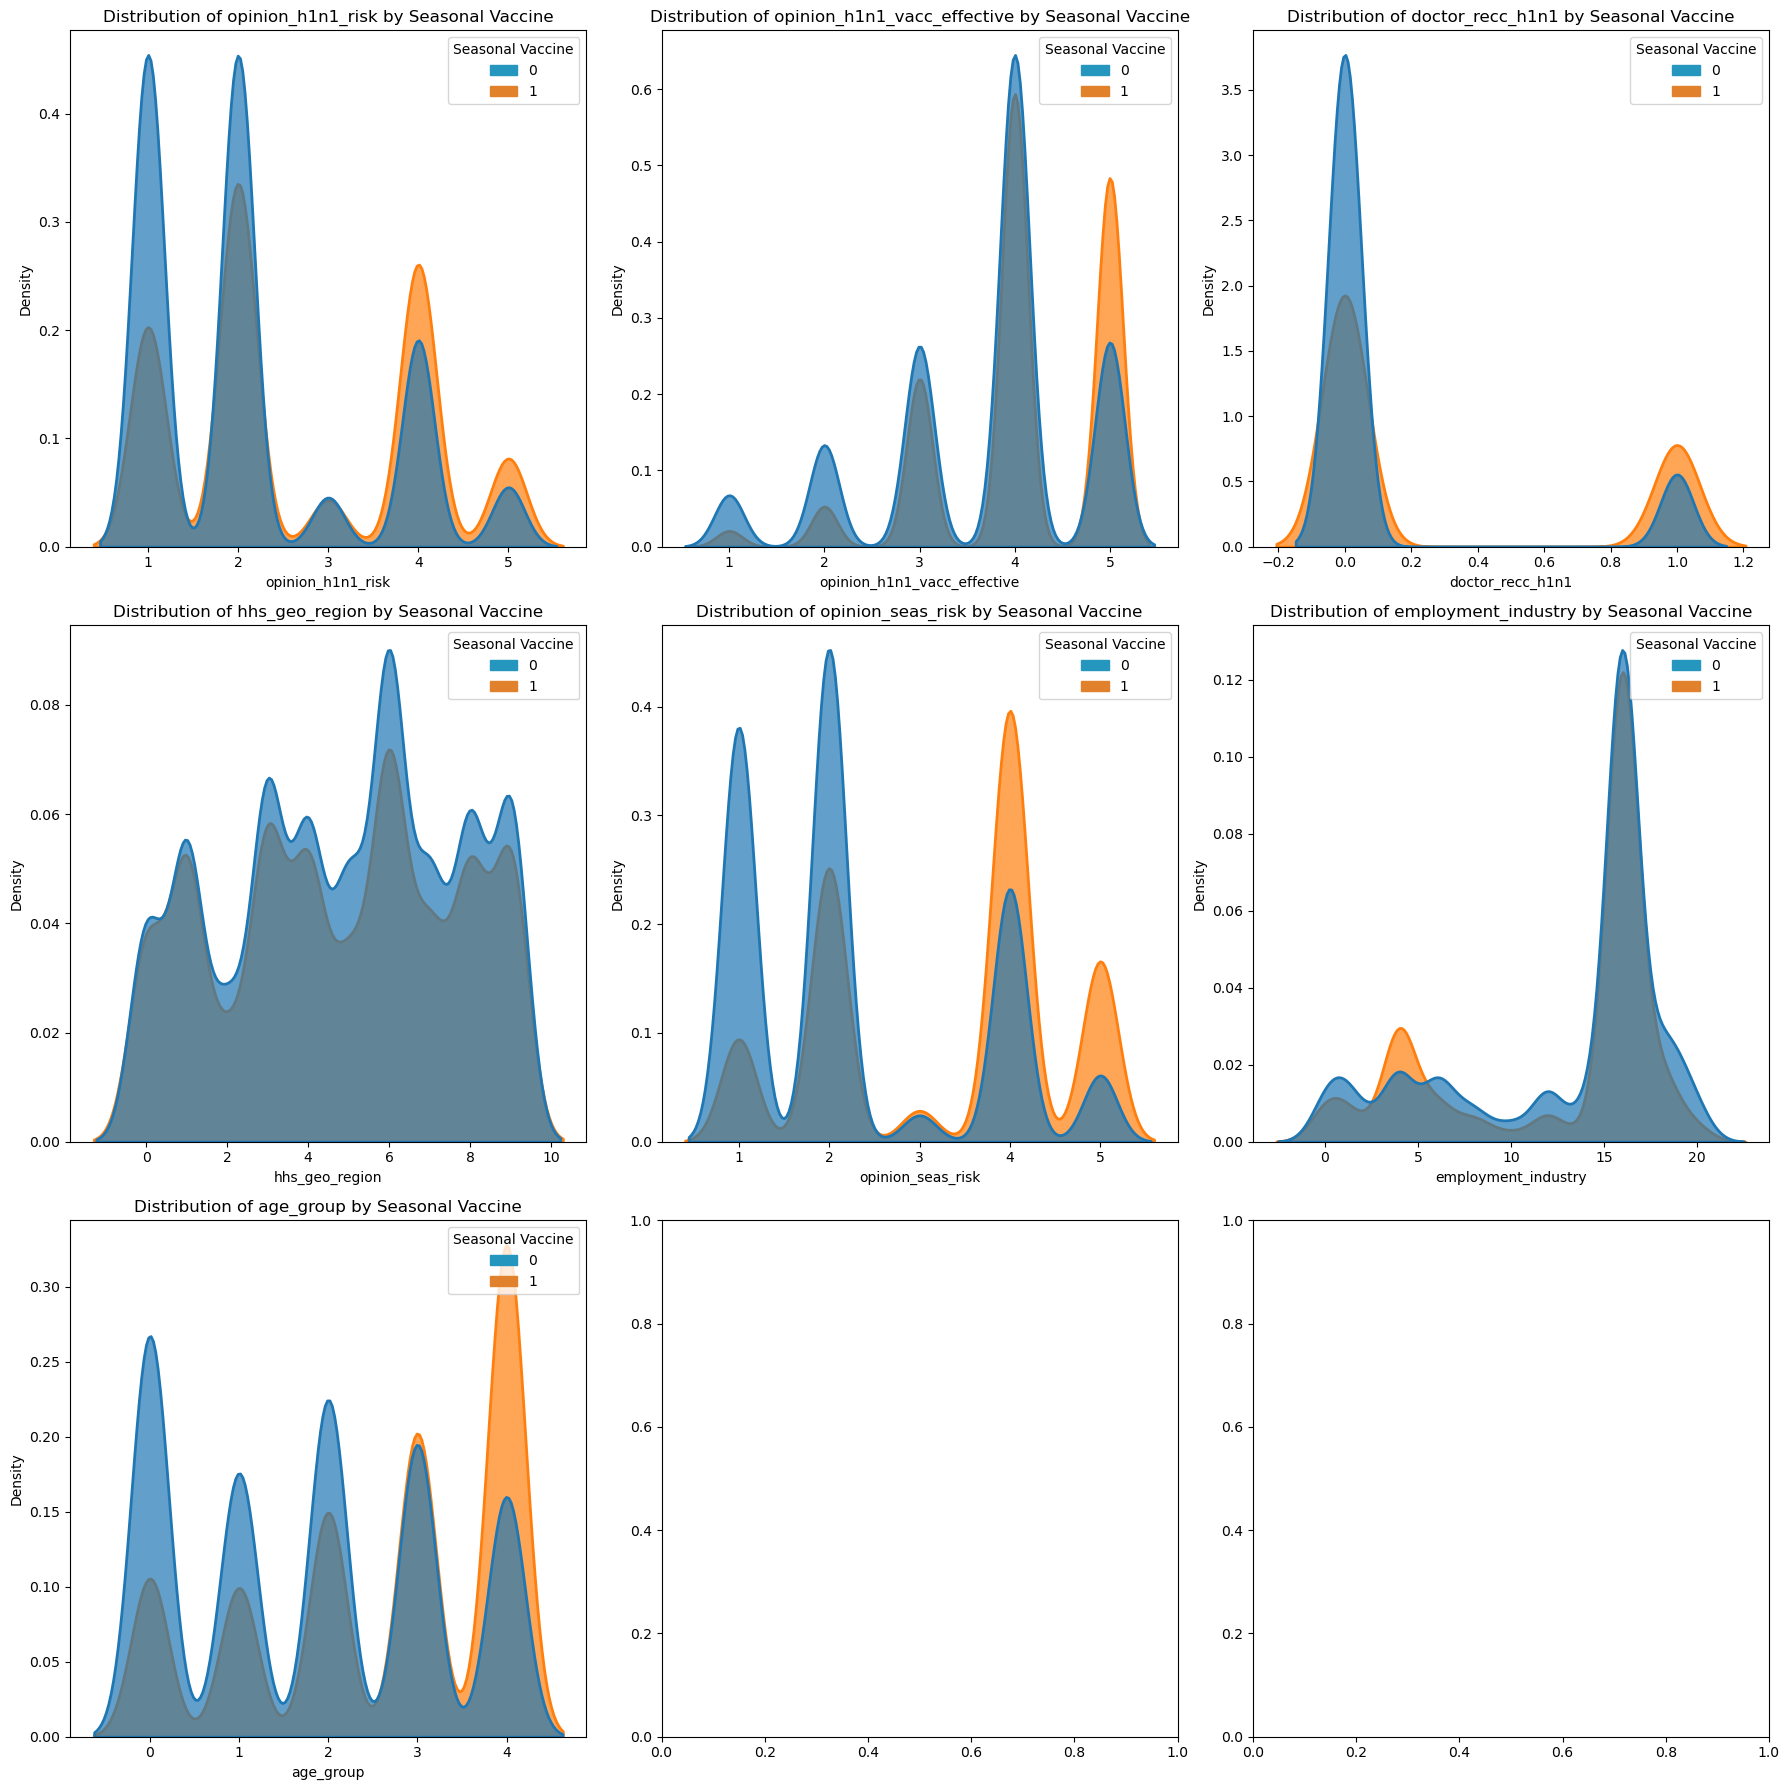

In [47]:
num_features = len(features)
num_rows = (num_features - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

# Creating Density plots for all feauters
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    sns.kdeplot(data=df_trainV2, x=feature, hue='seasonal_vaccine', fill=True, ax=ax, linewidth=2, alpha=0.7)
    ax.set_title(f'Distribution of {feature} by Seasonal Vaccine')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

    legend_handles = [
        mpatches.Patch(color='#2596be', label='0'),
        mpatches.Patch(color='#e1812c', label='1')
    ]
    ax.legend(handles=legend_handles, title='Seasonal Vaccine', loc='upper right')

plt.tight_layout()
plt.show()

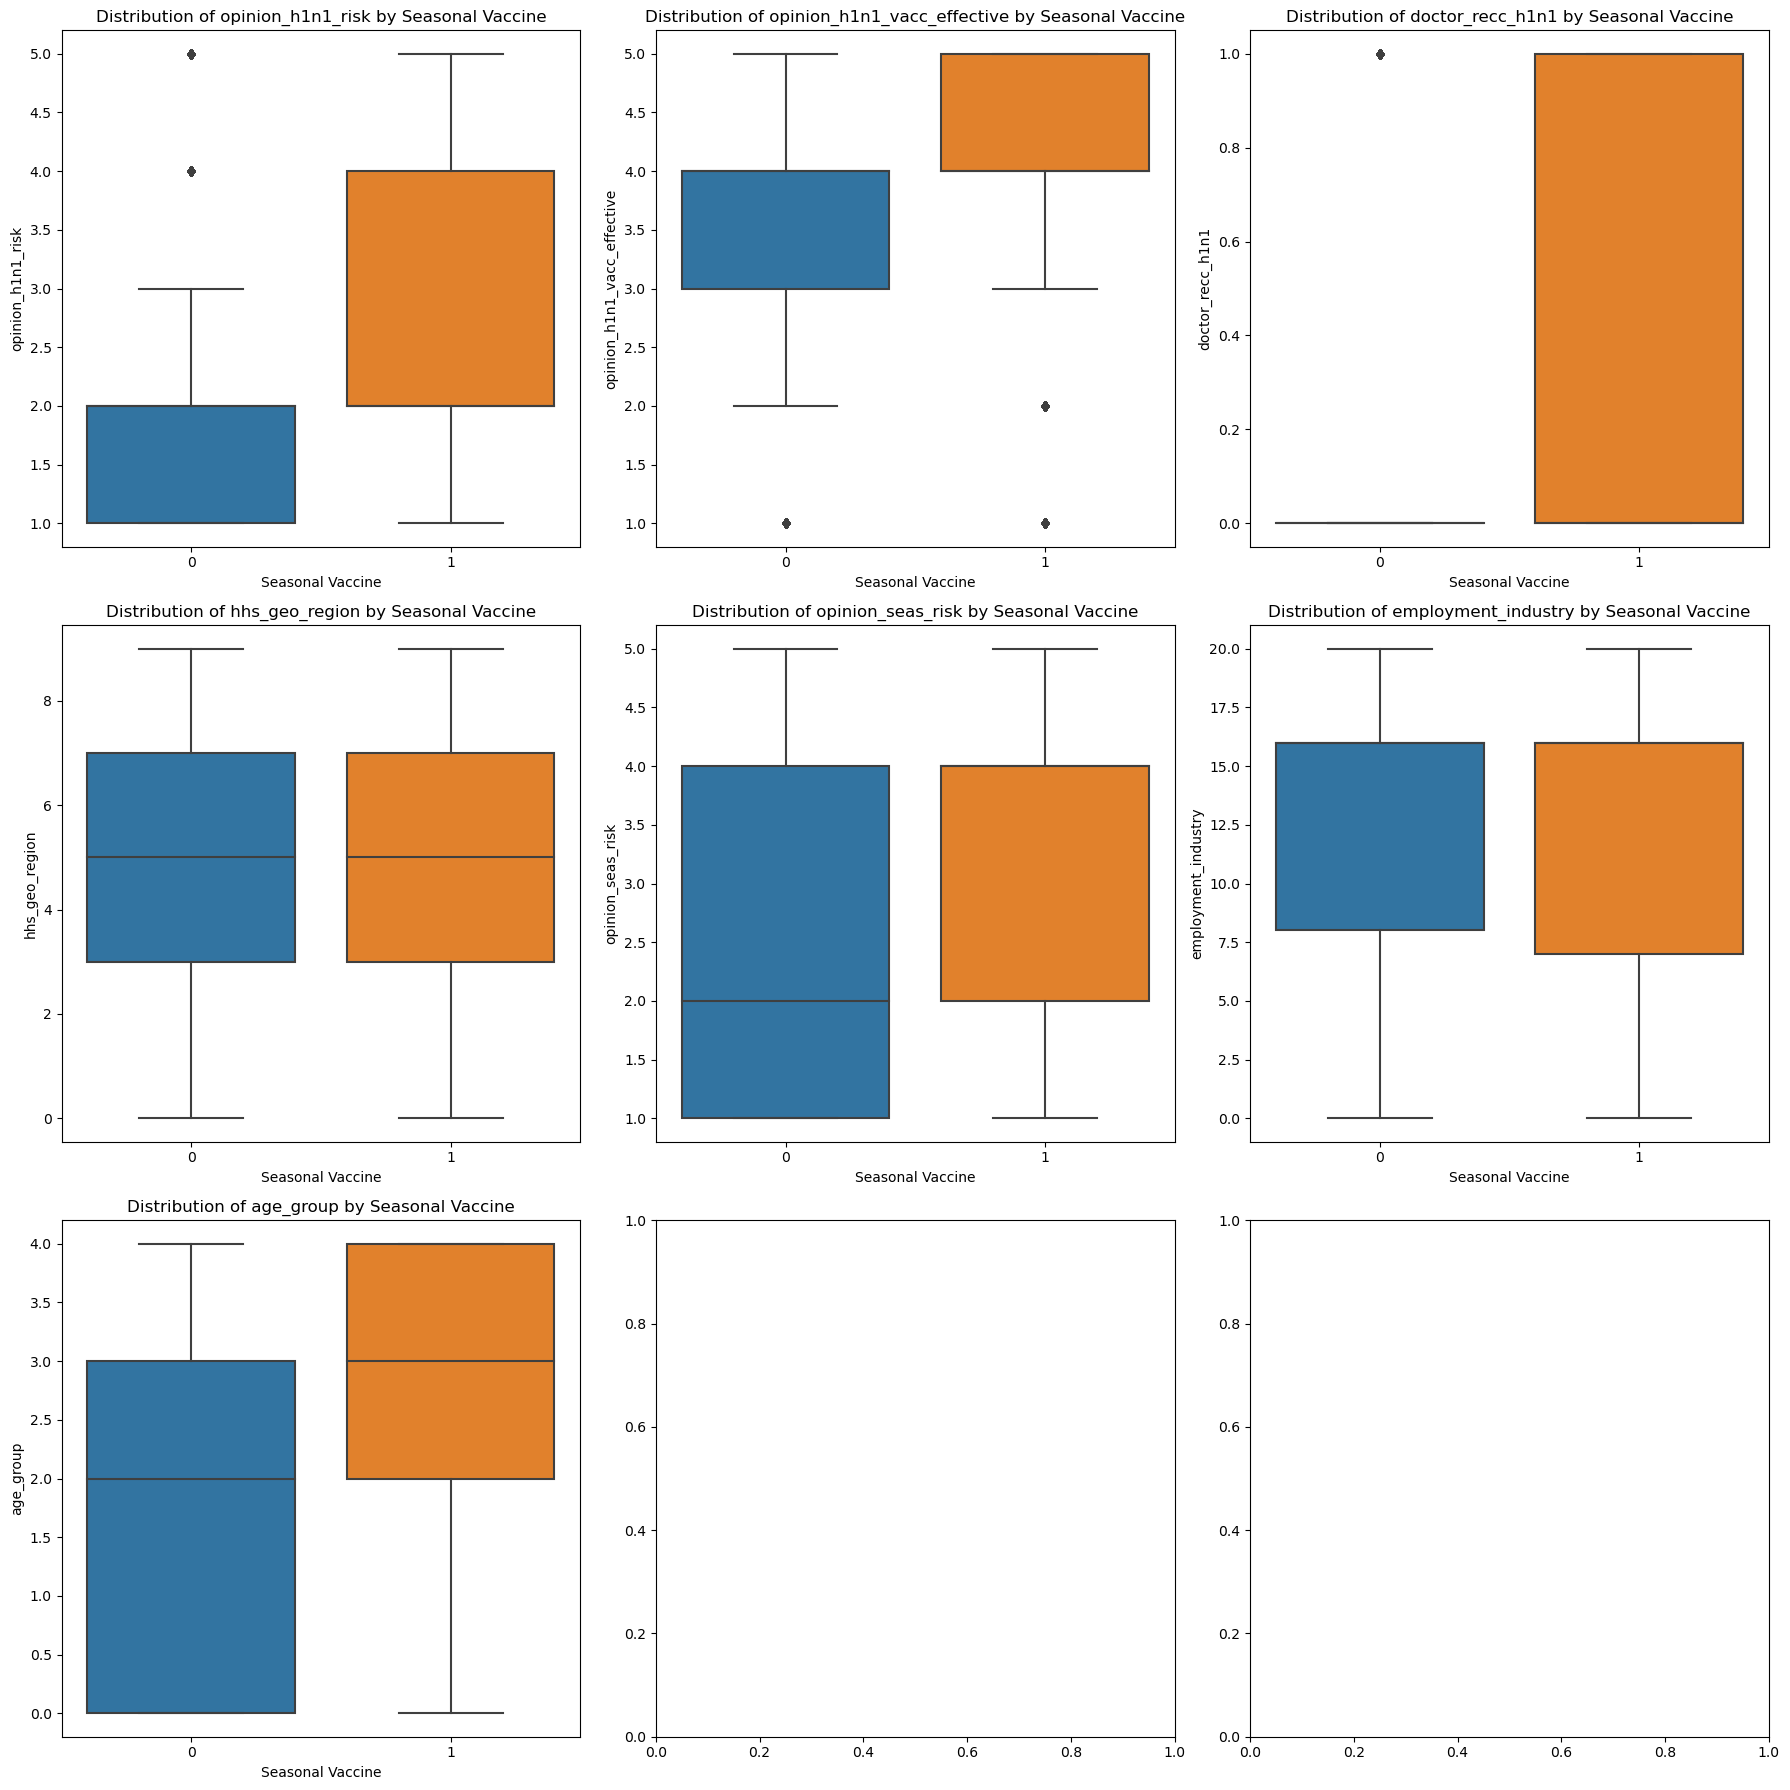

In [48]:
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    sns.boxplot(data=df_trainV2, x='seasonal_vaccine', y=feature, ax=ax)
    ax.set_title(f'Distribution of {feature} by Seasonal Vaccine')
    ax.set_xlabel('Seasonal Vaccine')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()


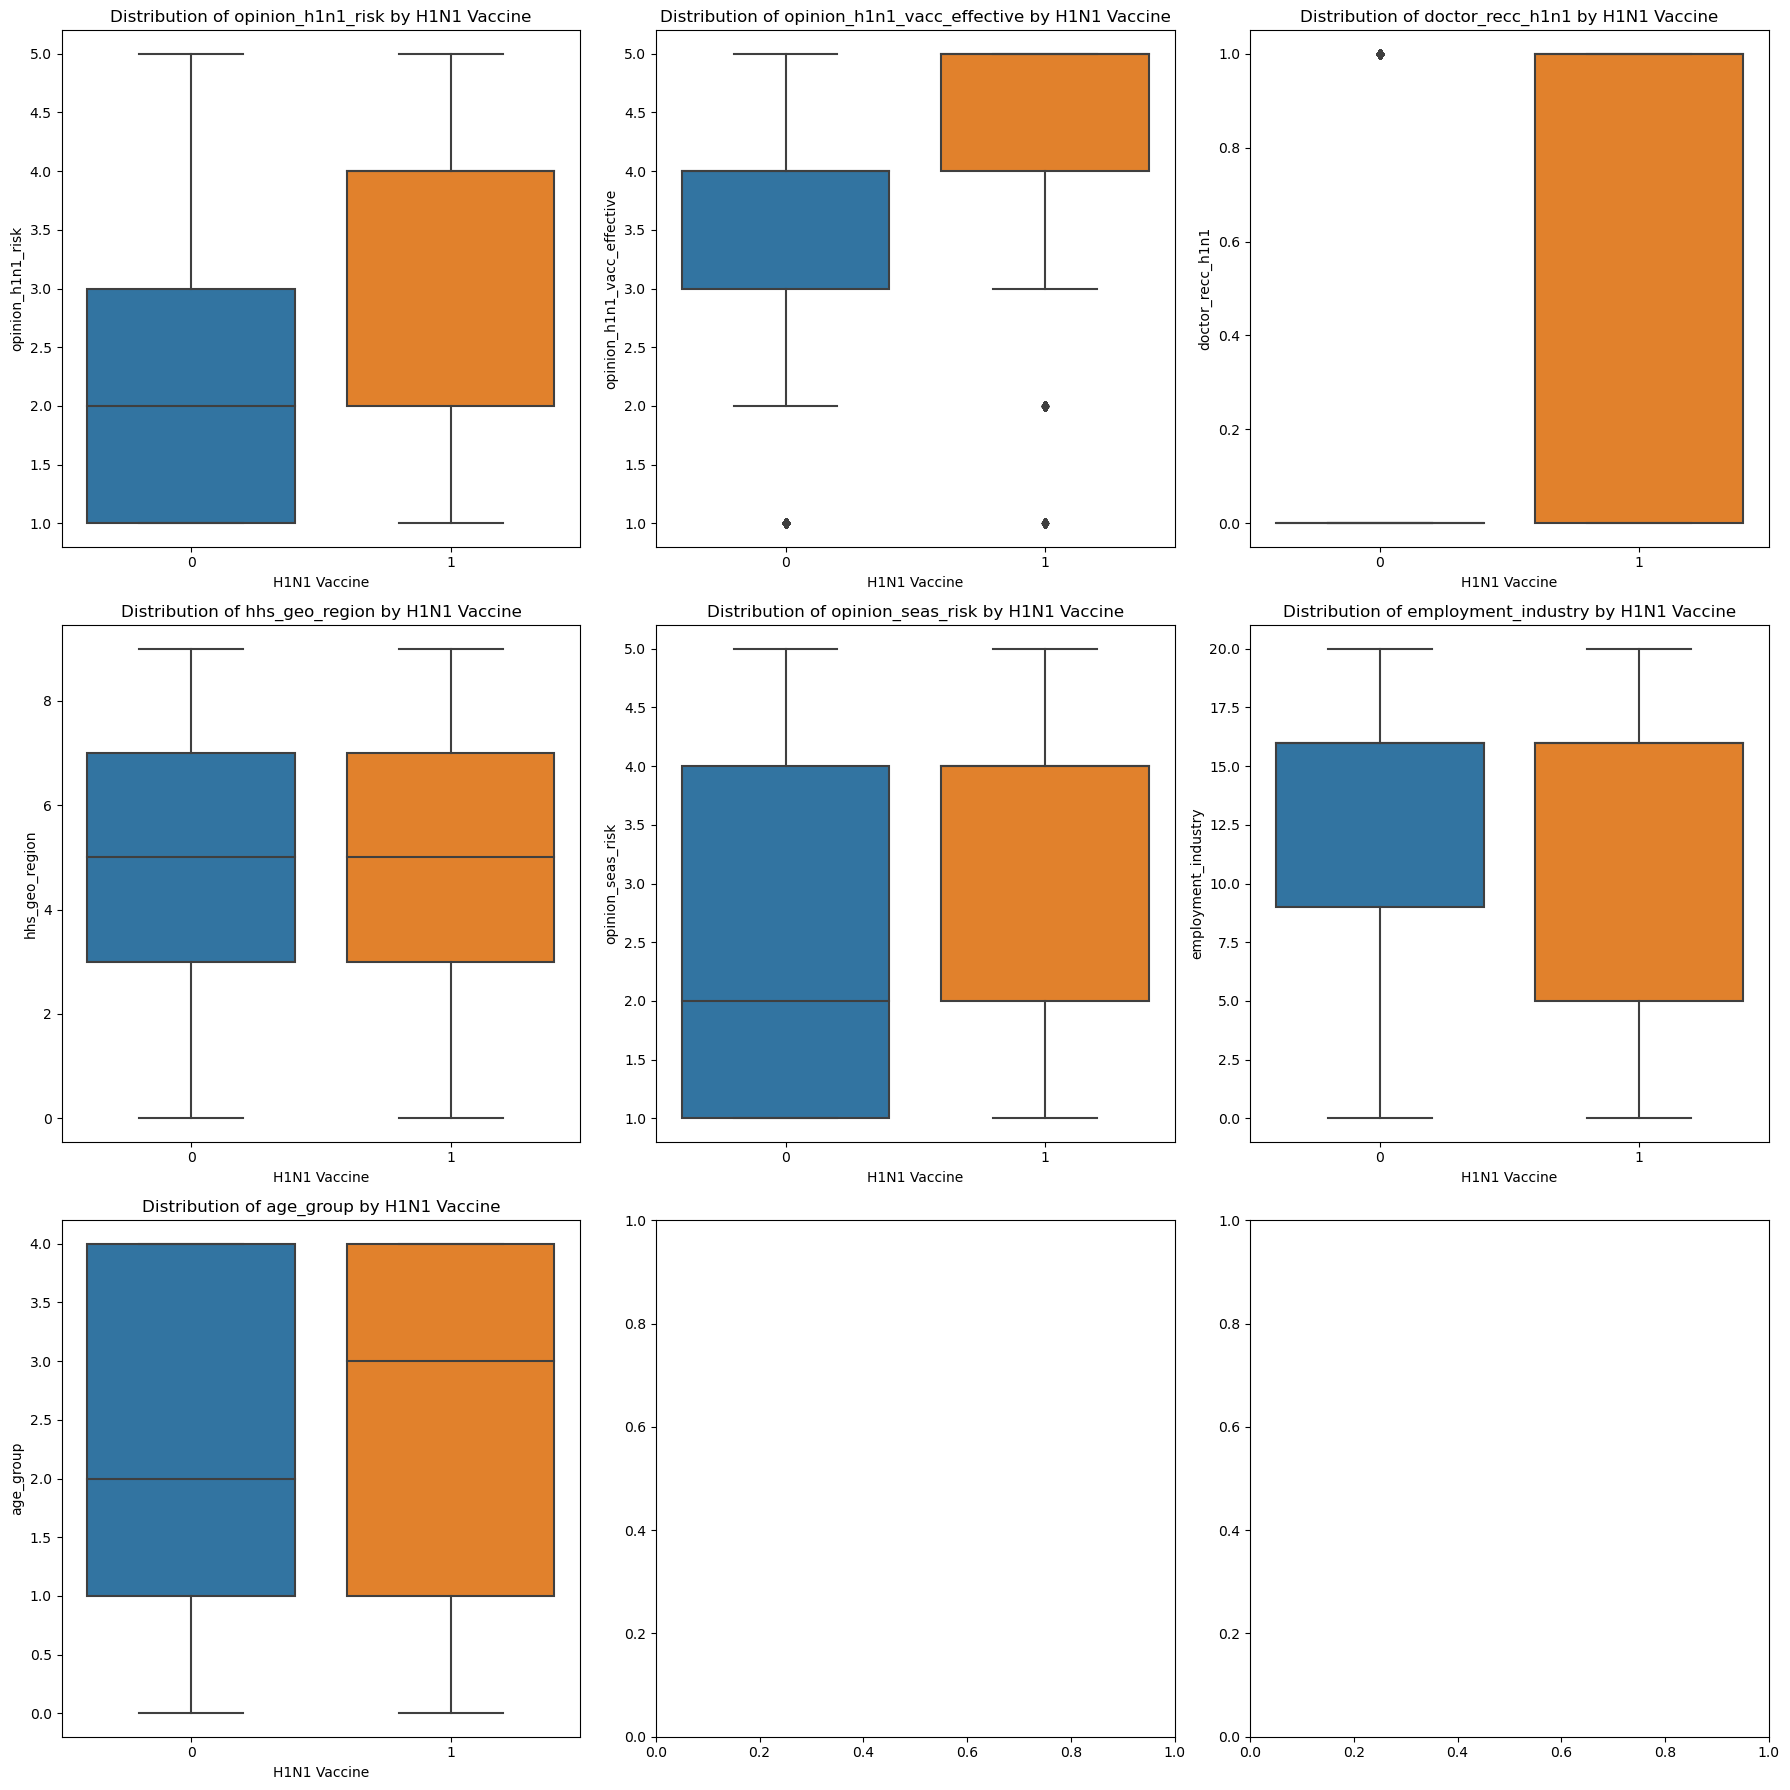

In [49]:
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    sns.boxplot(data=df_trainV2, x='h1n1_vaccine', y=feature, ax=ax)
    ax.set_title(f'Distribution of {feature} by H1N1 Vaccine')
    ax.set_xlabel('H1N1 Vaccine')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

Standardisation using X = (X - X.mean()) / X.std())
* Used to scale the encoded numerical data

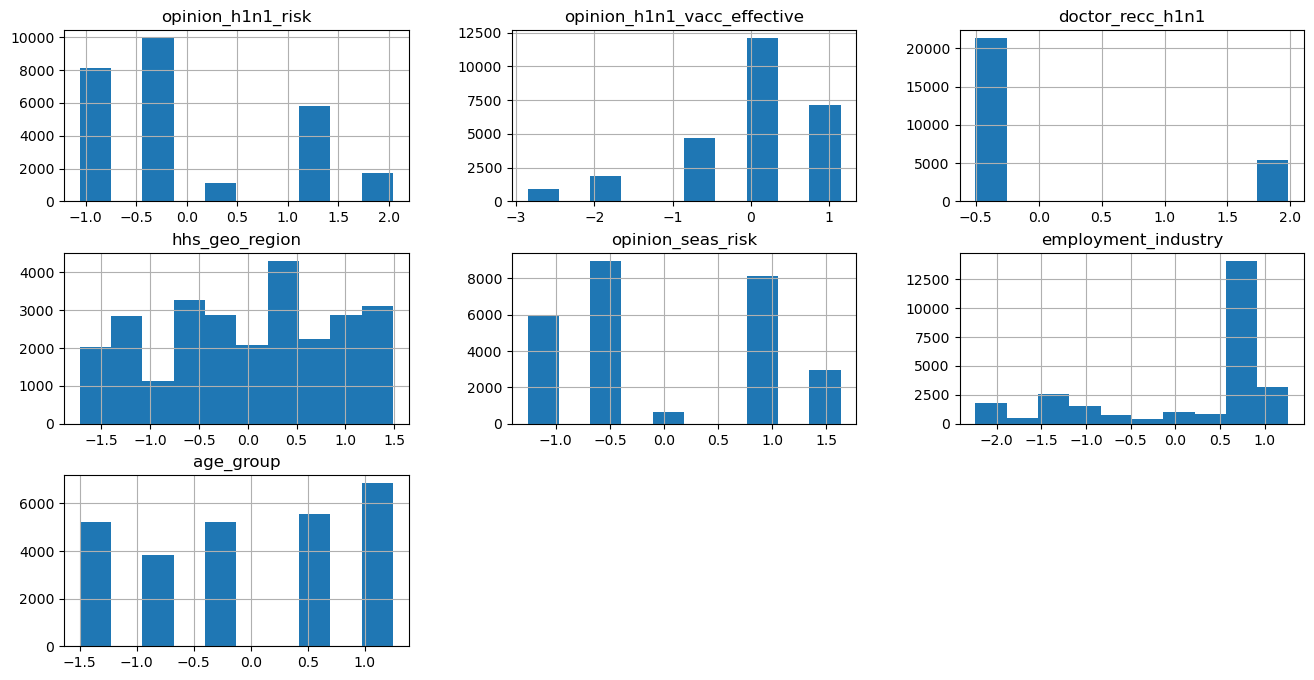

In [50]:
X_V2 = df_trainV2[features]
X_V2_scaled = (X_V2 - X_V2.mean()) / X_V2.std()

X_V2_scaled.hist(figsize=(16, 8))
plt.show()

## Preparing Training and test data

Selecting relevant featurers then:
* Split data into features and target
* Split data into training and testing set (for evaluation)

In [51]:
#Features and targets
X_train_V2 = df_trainV2.drop(['h1n1_vaccine','seasonal_vaccine'], axis =1)
y_h1n1_V2 = df_labelsV2['h1n1_vaccine']
y_seasonal_V2 = df_labelsV2['seasonal_vaccine']

#training testing sets
X_train_h1n1_V2, X_test_h1n1_V2, y_train_h1n1_V2, y_test_h1n1_V2 = train_test_split(X_V2_scaled, y_h1n1_V2, test_size=0.2, random_state=42)
X_train_seasonal_V2, X_test_seasonal_V2, y_train_seasonal_V2, y_test_seasonal_V2 = train_test_split(X_V2_scaled, y_seasonal_V2, test_size=0.25, random_state=42)

Now that the data is pre processed and split for testing and training I will be testing the sets on two models:
* Random Forest Model
* Support Vector Machine Model

## Random Forest Tuning

Utilising a randomised search to find the best hyper tuned parameters 

In [52]:
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform randomized search with 5-fold cross-validation for h1n1_vaccine
h1n1_random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, verbose = 10)
h1n1_random_search.fit(X_train_h1n1_V2, y_train_h1n1_V2)

seasonal_random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, verbose =10)
seasonal_random_search.fit(X_train_seasonal_V2, y_train_seasonal_V2)


print("Best Hyperparameters for h1n1_vaccine:")
print(h1n1_random_search.best_params_)
print("Best Score for h1n1_vaccine:", h1n1_random_search.best_score_)

print("\nBest Hyperparameters for seasonal_vaccine:")
print(seasonal_random_search.best_params_)
print("Best Score for seasonal_vaccine:", seasonal_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/5; 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.821 total time=   2.3s
[CV 2/5; 1/10] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/5; 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.829 total time=   2.4s
[CV 3/5; 1/10] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.824 total time=   2.1s
[CV 4/5; 1/10] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 4/5; 1/10] END max_depth=20, max_features=sqrt, min_sample

[CV 3/5; 7/10] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.827 total time=   2.0s
[CV 4/5; 7/10] START max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 4/5; 7/10] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.830 total time=   2.1s
[CV 5/5; 7/10] START max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 5/5; 7/10] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.835 total time=   2.3s
[CV 1/5; 8/10] START max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 1/5; 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.824 total time=   1.2s
[CV 2/5; 8/10] START max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples

[CV 5/5; 3/10] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=500;, score=0.713 total time=   5.3s
[CV 1/5; 4/10] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 1/5; 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.724 total time=   1.2s
[CV 2/5; 4/10] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 2/5; 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.704 total time=   1.1s
[CV 3/5; 4/10] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 3/5; 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.718 total time=   1.1s
[CV 4/5; 4/10] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=

[CV 3/5; 10/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.726 total time=   1.0s
[CV 4/5; 10/10] START max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 10/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.713 total time=   0.9s
[CV 5/5; 10/10] START max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 5/5; 10/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.726 total time=   0.9s
Best Hyperparameters for h1n1_vaccine:
{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Best Score for h1n1_vaccine: 0.8325298385209454

Best Hyperparameters for seasonal_vaccine:
{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'

## Random Forest Evaluation

In [53]:
rf_h1n1_vaccine = RandomForestClassifier(n_estimators=187, max_depth=10, max_features='sqrt', min_samples_leaf=3, min_samples_split=4, random_state=42)
rf_h1n1_vaccine.fit(X_train_h1n1_V2, y_train_h1n1_V2)

rf_seasonal_vaccine = RandomForestClassifier(n_estimators=206, max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=8, random_state=42)
rf_seasonal_vaccine.fit(X_train_seasonal_V2, y_train_seasonal_V2)

# Perform k-fold cross-validation 
h1n1_cv_scores = cross_val_score(rf_h1n1_vaccine, X_train_h1n1_V2, y_train_h1n1_V2, cv=5)
seasonal_cv_scores = cross_val_score(rf_seasonal_vaccine, X_train_seasonal_V2, y_train_seasonal_V2, cv=5)


print("5 Fold Cross-Validation Scores for h1n1_vaccine:")
for i, score in enumerate(h1n1_cv_scores):
    print("Fold", i+1, "Score:", score)
print("Average Score for h1n1_vaccine:", h1n1_cv_scores.mean())

print()

print("5 Fold Cross-Validation Scores for seasonal_vaccine:")
for i, score in enumerate(seasonal_cv_scores):
    print("Fold", i+1, "Score:", score)
print("Average Score for seasonal_vaccine:", seasonal_cv_scores.mean())

5 Fold Cross-Validation Scores for h1n1_vaccine:
Fold 1 Score: 0.8268195647086356
Fold 2 Score: 0.8357126140884624
Fold 3 Score: 0.8303299789375146
Fold 4 Score: 0.8340744207816523
Fold 5 Score: 0.8357126140884624
Average Score for h1n1_vaccine: 0.8325298385209455

5 Fold Cross-Validation Scores for seasonal_vaccine:
Fold 1 Score: 0.7358961557663505
Fold 2 Score: 0.7246630054917623
Fold 3 Score: 0.7358961557663505
Fold 4 Score: 0.7189216175736396
Fold 5 Score: 0.7348976535197205
Average Score for seasonal_vaccine: 0.7300549176235647


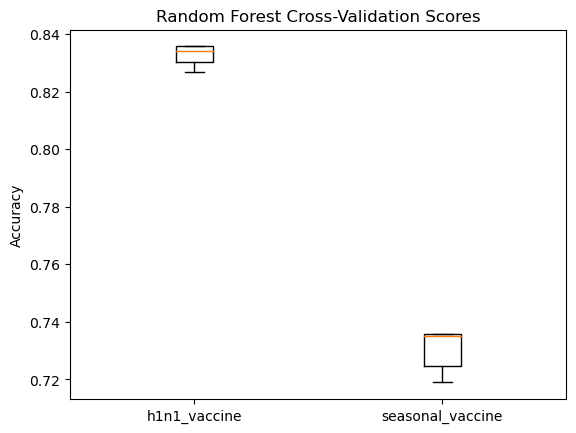

In [54]:
cv_scores = [h1n1_cv_scores, seasonal_cv_scores]

fig, ax = plt.subplots()
ax.boxplot(cv_scores)

ax.set_xticklabels(['h1n1_vaccine', 'seasonal_vaccine'])
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Cross-Validation Scores')
 
# Show the plot
plt.show()

In [55]:
classifier = RandomForestClassifier()
y_pred_h1n1 = cross_val_predict(classifier, X_test_h1n1_V2, y_test_h1n1_V2, cv=5)
report_h1n1 = classification_report(y_test_h1n1_V2, y_pred_h1n1)
print("Evaluation Report using RF classifier")
print('H1N1 Vaccine Evaluation:')
print(report_h1n1)
print()

y_pred_seasonal = cross_val_predict(classifier, X_test_seasonal_V2, y_test_seasonal_V2, cv=5)
report_seasonal = classification_report(y_test_seasonal_V2, y_pred_seasonal)
print('Seasonal Vaccine Evaluation:')
print(report_seasonal)

Evaluation Report using RF classifier
H1N1 Vaccine Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4212
           1       0.55      0.42      0.48      1130

    accuracy                           0.81      5342
   macro avg       0.70      0.67      0.68      5342
weighted avg       0.79      0.81      0.80      5342


Seasonal Vaccine Evaluation:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      3634
           1       0.67      0.66      0.67      3043

    accuracy                           0.70      6677
   macro avg       0.70      0.70      0.70      6677
weighted avg       0.70      0.70      0.70      6677



Confusionn


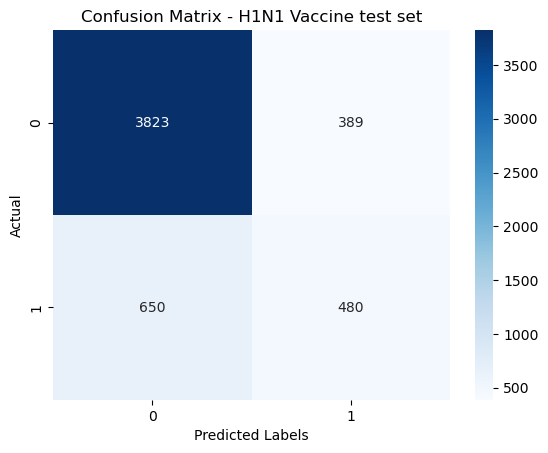

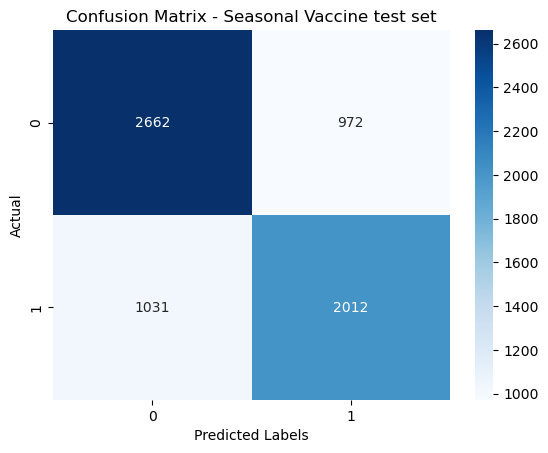

In [56]:
confusion_matrix_h1n1 = confusion_matrix(y_test_h1n1_V2, y_pred_h1n1)
confusion_matrix_seasonal = confusion_matrix(y_test_seasonal_V2, y_pred_seasonal)

print("Confusionn")
sns.heatmap(confusion_matrix_h1n1, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - H1N1 Vaccine test set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")
plt.show()

sns.heatmap(confusion_matrix_seasonal, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Seasonal Vaccine test set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")
plt.show()

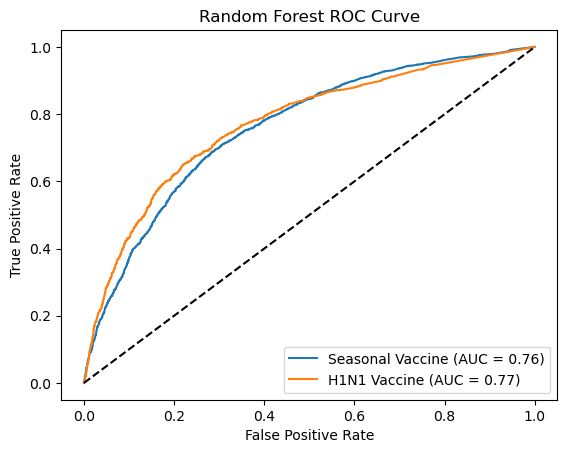

In [57]:
# ROC Evaluation
y_scores_h1n1 = cross_val_predict(classifier, X_test_h1n1_V2, y_test_h1n1_V2, cv=5, method='predict_proba')[:, 1]
fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test_h1n1_V2, y_scores_h1n1)
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

y_scores_seasonal = cross_val_predict(classifier, X_test_seasonal_V2, y_test_seasonal_V2, cv=5, method='predict_proba')[:, 1]
fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test_seasonal_V2, y_scores_seasonal)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)


plt.plot(fpr_seasonal, tpr_seasonal, label='Seasonal Vaccine (AUC = %0.2f)' % roc_auc_seasonal)
plt.plot(fpr_h1n1, tpr_h1n1, label='H1N1 Vaccine (AUC = %0.2f)' % roc_auc_h1n1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

## SVM Tuning

In [58]:
svm_classifier = SVC()
param_grid = {
    'C': [0.1, 1], #Chose a smaller range to speed up search
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Grid search 
grid_search_h1n1 = GridSearchCV(svm_classifier, param_grid, cv=3, verbose=10)
grid_search_seasonal = GridSearchCV(svm_classifier, param_grid, cv=3, verbose=10)

# Fitting data 
grid_search_h1n1.fit(X_train_h1n1_V2, y_train_h1n1_V2)
grid_search_seasonal.fit(X_train_seasonal_V2, y_train_seasonal_V2)

print("Best Hyperparameters for h1n1_vaccine:")
print(grid_search_h1n1.best_params_)
print("Best Score for h1n1_vaccine:", grid_search_h1n1.best_score_)

print("\nBest Hyperparameters for seasonal_vaccine:")
print(grid_search_seasonal.best_params_)
print("Best Score for seasonal_vaccine:", grid_search_seasonal.best_score_)

best_svm_h1n1 = grid_search_h1n1.best_estimator_
best_svm_seasonal = grid_search_seasonal.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START C=0.1, gamma=scale, kernel=linear...........................
[CV 1/3; 1/4] END C=0.1, gamma=scale, kernel=linear;, score=0.810 total time=   5.8s
[CV 2/3; 1/4] START C=0.1, gamma=scale, kernel=linear...........................
[CV 2/3; 1/4] END C=0.1, gamma=scale, kernel=linear;, score=0.797 total time=   6.4s
[CV 3/3; 1/4] START C=0.1, gamma=scale, kernel=linear...........................
[CV 3/3; 1/4] END C=0.1, gamma=scale, kernel=linear;, score=0.822 total time=   5.7s
[CV 1/3; 2/4] START C=0.1, gamma=scale, kernel=rbf..............................
[CV 1/3; 2/4] END C=0.1, gamma=scale, kernel=rbf;, score=0.824 total time=  14.6s
[CV 2/3; 2/4] START C=0.1, gamma=scale, kernel=rbf..............................
[CV 2/3; 2/4] END C=0.1, gamma=scale, kernel=rbf;, score=0.825 total time=  18.2s
[CV 3/3; 2/4] START C=0.1, gamma=scale, kernel=rbf..............................
[CV 3/3; 2/4] END C=0.1, gamma=scal

## SVM Evaluation

In [59]:
# Train SVM models to evaluate different kernels
kernels = ['linear', 'poly', 'sigmoid', 'rbf']

# For h1n1_vaccine
print("Evaluation for h1n1_vaccine:")
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train_h1n1_V2, y_train_h1n1_V2)

    # Predict the labels for the testing set
    y_pred = clf.predict(X_test_h1n1_V2)

    # Calculate the precision and recall
    precision = precision_score(y_test_h1n1_V2, y_pred)
    recall = recall_score(y_test_h1n1_V2, y_pred)
    accuracy = clf.score(X_test_h1n1_V2, y_test_h1n1_V2)

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}\n")

# For seasonal_vaccine
print("Evaluation for seasonal_vaccine:")
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train_seasonal_V2, y_train_seasonal_V2)

    # Predict the labels for the testing set
    y_pred = clf.predict(X_test_seasonal_V2)

    # Calculate the precision and recall
    precision = precision_score(y_test_seasonal_V2, y_pred)
    recall = recall_score(y_test_seasonal_V2, y_pred)
    accuracy = clf.score(X_test_seasonal_V2, y_test_seasonal_V2)

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}\n")

Evaluation for h1n1_vaccine:
Kernel: linear
Accuracy: 0.818
Precision: 0.586
Recall: 0.477

Kernel: poly
Accuracy: 0.830
Precision: 0.666
Recall: 0.393

Kernel: sigmoid
Accuracy: 0.750
Precision: 0.408
Recall: 0.401

Kernel: rbf
Accuracy: 0.833
Precision: 0.670
Recall: 0.412

Evaluation for seasonal_vaccine:
Kernel: linear
Accuracy: 0.730
Precision: 0.721
Recall: 0.664

Kernel: poly
Accuracy: 0.722
Precision: 0.736
Recall: 0.610

Kernel: sigmoid
Accuracy: 0.624
Precision: 0.586
Recall: 0.597

Kernel: rbf
Accuracy: 0.741
Precision: 0.717
Recall: 0.714



In [60]:
# Hyper parameter recommendations for SVM classifiers
svm_h1n1 = SVC(C=1, gamma='scale', kernel='rbf')
svm_seasonal = SVC(C=1, gamma='scale', kernel='rbf')

svm_h1n1.fit(X_train_h1n1_V2, y_train_h1n1_V2)
svm_seasonal.fit(X_train_seasonal_V2, y_train_seasonal_V2)

y_pred_h1n1 = svm_h1n1.predict(X_test_h1n1_V2)
y_pred_seasonal = svm_seasonal.predict(X_test_seasonal_V2)


print("Evaluation for h1n1_vaccine:")
print(classification_report(y_test_h1n1_V2, y_pred_h1n1))
print("Evaluation for seasonal_vaccine:")
print(classification_report(y_test_seasonal_V2, y_pred_seasonal))

Evaluation for h1n1_vaccine:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.67      0.41      0.51      1130

    accuracy                           0.83      5342
   macro avg       0.76      0.68      0.70      5342
weighted avg       0.82      0.83      0.82      5342

Evaluation for seasonal_vaccine:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      3634
           1       0.72      0.71      0.72      3043

    accuracy                           0.74      6677
   macro avg       0.74      0.74      0.74      6677
weighted avg       0.74      0.74      0.74      6677



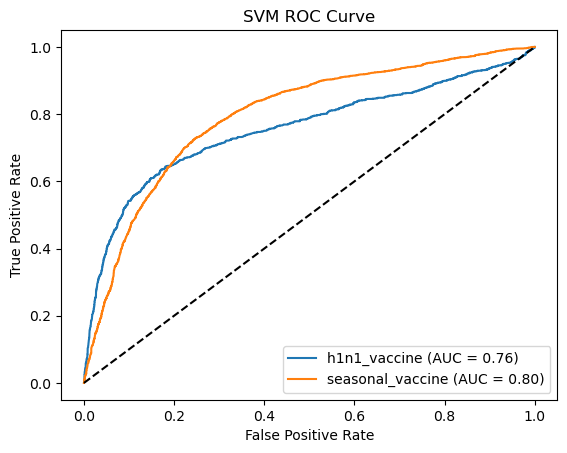

In [61]:
y_scores_h1n1 = svm_h1n1.decision_function(X_test_h1n1_V2)
y_scores_seasonal = svm_seasonal.decision_function(X_test_seasonal_V2)

# False Positive rate calculation
fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test_h1n1_V2, y_scores_h1n1)
fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test_seasonal_V2, y_scores_seasonal)

# AUC caluclations 
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot ROC 
plt.plot(fpr_h1n1, tpr_h1n1, label='h1n1_vaccine (AUC = %0.2f)' % roc_auc_h1n1)
plt.plot(fpr_seasonal, tpr_seasonal, label='seasonal_vaccine (AUC = %0.2f)' % roc_auc_seasonal)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


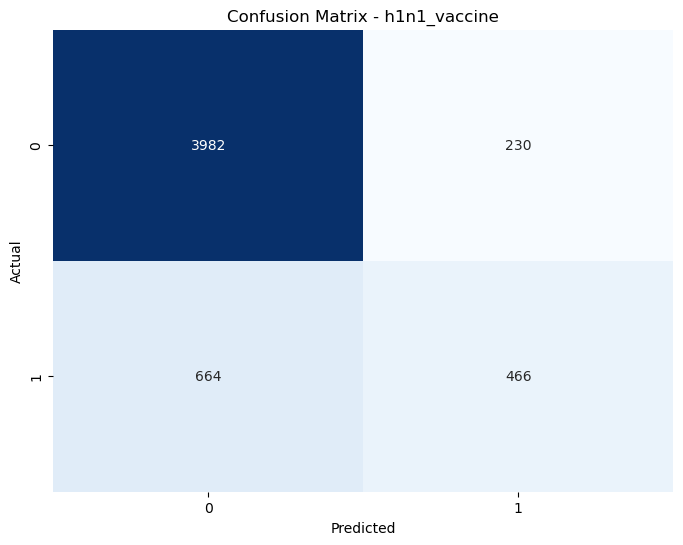

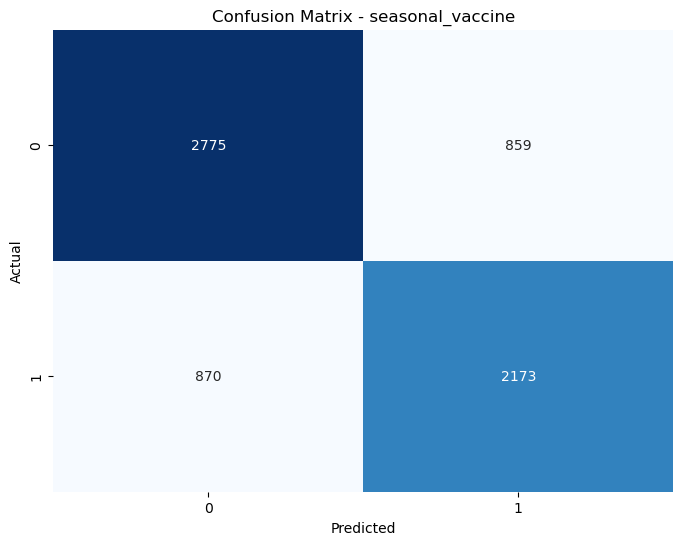

In [62]:
# Confusion matrix
cm_h1n1 = confusion_matrix(y_test_h1n1_V2, y_pred_h1n1)
cm_seasonal = confusion_matrix(y_test_seasonal_V2, y_pred_seasonal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - h1n1_vaccine')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - seasonal_vaccine')
plt.show()

# Accuracy Evaluation

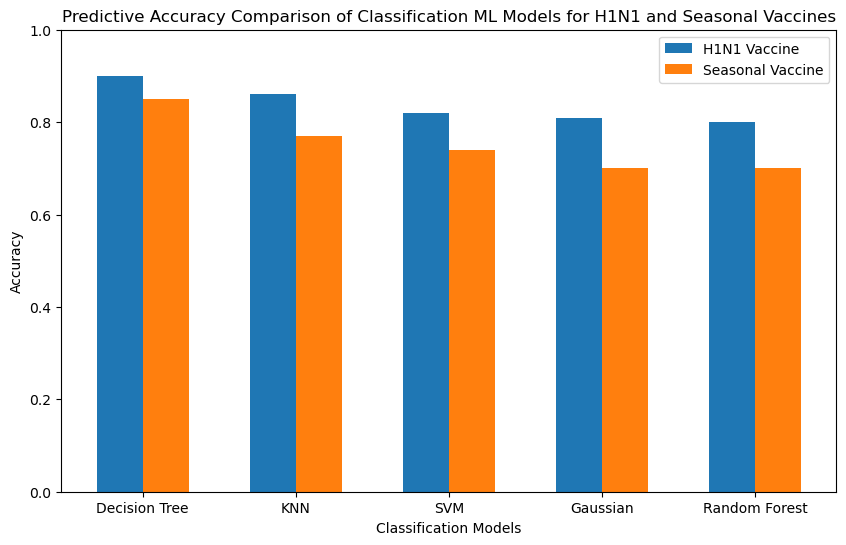

In [64]:
#Intialise data on accuracy for each model
models = ['KNN', 'Gaussian', 'Decision Tree', 'Random Forest', 'SVM']
h1n1_accuracies = [0.86, 0.81, 0.90, 0.80, 0.82]
seasonal_accuracies = [0.77, 0.70, 0.85, 0.70, 0.74]

#Sort bar based on most accurate to lowest 
sorted_indices = np.argsort(h1n1_accuracies)[::-1]
models = np.array(models)[sorted_indices]
h1n1_accuracies = np.array(h1n1_accuracies)[sorted_indices]
seasonal_accuracies = np.array(seasonal_accuracies)[sorted_indices]


bar_positions = np.arange(len(models))

plt.figure(figsize=(10, 6))

plt.bar(bar_positions, h1n1_accuracies, width=0.3, label='H1N1 Vaccine')
plt.bar(bar_positions + 0.3, seasonal_accuracies, width=0.3, label='Seasonal Vaccine')

plt.xticks(bar_positions + 0.3 / 2, models)

plt.title('Predictive Accuracy Comparison of Classification ML Models for H1N1 and Seasonal Vaccines')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()